<a href="https://colab.research.google.com/github/gangasani-anusha/DL_CatchUP_Assignment1/blob/main/CatchUP_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. CNN, GRU and BAG OF WORDS

### CNN

#### Import TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


#### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


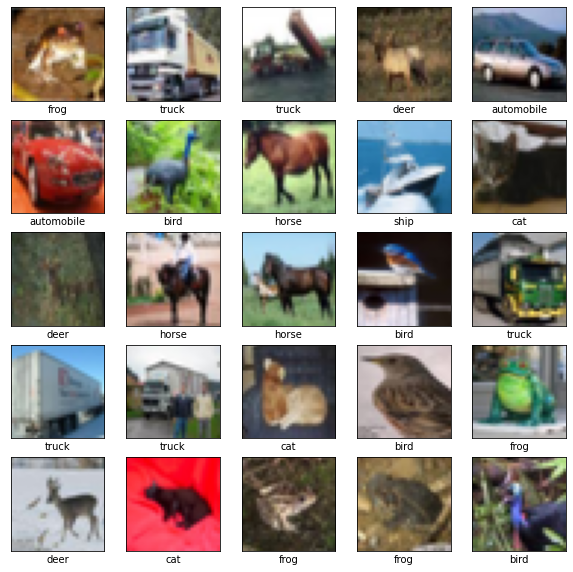

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

#### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

#### Compile and train the model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 18s 5ms/step - loss: 1.5177 - accuracy: 0.4493 - val_loss: 1.2333 - val_accuracy: 0.5608
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1471 - accuracy: 0.5955 - val_loss: 1.0773 - val_accuracy: 0.6154
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9982 - accuracy: 0.6492 - val_loss: 1.0044 - val_accuracy: 0.6497
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9148 - accuracy: 0.6788 - val_loss: 0.9693 - val_accuracy: 0.6585
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8403 - accuracy: 0.7036 - val_loss: 0.8696 - val_accuracy: 0.6971
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7789 - accuracy: 0.7272 - val_loss: 0.8566 - val_accuracy: 0.7006
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7228 - accuracy: 0.7454 - val_loss: 0.8698 - val_accuracy

#### Evaluate the model

313/313 - 1s - loss: 0.9160 - accuracy: 0.6979 - 748ms/epoch - 2ms/step


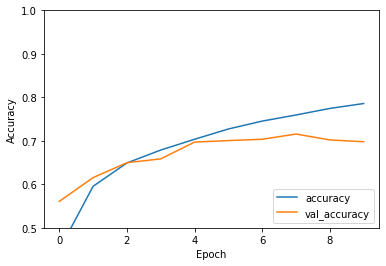

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.6978999972343445


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

## GRU

In [14]:
!curl -O https://raw.githubusercontent.com/deepjavalibrary/d2l-java/master/tools/fix-colab-gpu.sh && bash fix-colab-gpu.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   155  100   155    0     0   3522      0 --:--:-- --:--:-- --:--:--  3522
ln: failed to create symbolic link '/usr/lib64-nvidia/libcudart.so': File exists
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


#### Prepare Java Kernel for Google Colab
Since Java is not natively supported by Colab, we need to run the following code to enable Java kernel on Colab.

1. Run the cell bellow (click it and press Shift+Enter),
2. (If training on CPU, skip this step) If you want to use the GPU with MXNet in DJL 0.10.0, we need CUDA 10.1 or CUDA 10.2.
Since Colab supports CUDA 10.1, we will have to follow some steps to setup the environment.
Refresh the page (press F5) and stay at Python runtime on GPU. Run the file fix-colab-gpu script.

And then ensure that you have switched to CUDA 10.1.
3. After that, switch runtime to Java and hardware to GPU.(Might require refreshing the page and switching runtime)

Now you can write Java code.

In [15]:
!curl -O https://raw.githubusercontent.com/deepjavalibrary/d2l-java/master/tools/colab_build.sh && bash colab_build.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   520  100   520    0     0   3513      0 --:--:-- --:--:-- --:--:--  3513
Update environment...
Install Java...
Install Jupyter java kernel...
replace ijava-kernel/java/ijava-1.3.0.jar? [y]es, [n]o, [A]ll, [N]one, [r]ename: ename
error:  invalid response [ename]
replace ijava-kernel/java/ijava-1.3.0.jar? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ijava-kernel/java/kernel.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ijava-kernel/java/dependency-licenses/commons-lang3-3.8.1.jar/META-INF/LICENSE.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ijava-kernel/java/dependency-licenses/commons-lang3-3.8.1.jar/META-INF/NOTICE.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ijava-kernel/java/dependency-licenses/dependencies.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ijava-kernel/java/dependency-license

#### Gated Recurrent Units (GRU)
:label:`sec_gru`

In :numref:`sec_bptt`,
we discussed how gradients are calculated
in RNNs.
In particular we found that long products of matrices can lead
to vanishing or exploding gradients.
Let us briefly think about what such
gradient anomalies mean in practice:

* We might encounter a situation where an early observation is highly
  significant for predicting all future observations. Consider the somewhat
  contrived case where the first observation contains a checksum and the goal is
  to discern whether the checksum is correct at the end of the sequence. In this
  case, the influence of the first token is vital. We would like to have some
  mechanisms for storing vital early information in a *memory cell*. Without such
  a mechanism, we will have to assign a very large gradient to this observation,
  since it affects all the subsequent observations.
* We might encounter situations where some tokens carry no pertinent
  observation. For instance, when parsing a web page there might be auxiliary
  HTML code that is irrelevant for the purpose of assessing the sentiment
  conveyed on the page. We would like to have some mechanism for *skipping* such
  tokens in the latent state representation.
* We might encounter situations where there is a logical break between parts of
  a sequence. For instance, there might be a transition between chapters in a
  book, or a transition between a bear and a bull market for securities. In
  this case it would be nice to have a means of *resetting* our internal state
  representation.

A number of methods have been proposed to address this. One of the earliest is long short-term memory :cite:`Hochreiter.Schmidhuber.1997` which we
will discuss in :numref:`sec_lstm`. The gated recurrent unit (GRU)
:cite:`Cho.Van-Merrienboer.Bahdanau.ea.2014` is a slightly more streamlined
variant that often offers comparable performance and is significantly faster to
compute  :cite:`Chung.Gulcehre.Cho.ea.2014`.
Due to its simplicity, let us start with the GRU.

## Gated Hidden State

The key distinction between vanilla RNNs and GRUs
is that the latter support gating of the hidden state.
This means that we have dedicated mechanisms for
when a hidden state should be *updated* and
also when it should be *reset*.
These mechanisms are learned and they address the concerns listed above.
For instance, if the first token is of great importance
we will learn not to update the hidden state after the first observation.
Likewise, we will learn to skip irrelevant temporary observations.
Last, we will learn to reset the latent state whenever needed.
We discuss this in detail below.


### Reset Gate and Update Gate

The first thing we need to introduce are
the *reset gate* and the *update gate*.
We engineer them to be vectors with entries in $(0, 1)$
such that we can perform convex combinations.
For instance,
a reset gate would allow us to control how much of the previous state we might still want to remember.
Likewise, an update gate would allow us to control how much of the new state is just a copy of the old state.

We begin by engineering these gates.
:numref:`fig_gru_1` illustrates the inputs for both
the reset and update gates in a GRU, given the input
of the current time step
and the hidden state of the previous time step.
The outputs of two gates
are given by two fully-connected layers
with a sigmoid activation function.

![Computing the reset gate and the update gate in a GRU model.](https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/gru-1.svg)
:label:`fig_gru_1`

Mathematically,
for a given time step $t$,
suppose that the input is
a minibatch
$\mathbf{X}_t \in \mathbb{R}^{n \times d}$ (number of examples: $n$, number of inputs: $d$) and the hidden state of the previous time step is $\mathbf{H}_{t-1} \in \mathbb{R}^{n \times h}$ (number of hidden units: $h$). Then, the reset gate $\mathbf{R}_t \in \mathbb{R}^{n \times h}$ and update gate $\mathbf{Z}_t \in \mathbb{R}^{n \times h}$ are computed as follows:

$$
\begin{aligned}
\mathbf{R}_t = \sigma(\mathbf{X}_t \mathbf{W}_{xr} + \mathbf{H}_{t-1} \mathbf{W}_{hr} + \mathbf{b}_r),\\
\mathbf{Z}_t = \sigma(\mathbf{X}_t \mathbf{W}_{xz} + \mathbf{H}_{t-1} \mathbf{W}_{hz} + \mathbf{b}_z),
\end{aligned}
$$

where $\mathbf{W}_{xr}, \mathbf{W}_{xz} \in \mathbb{R}^{d \times h}$ and
$\mathbf{W}_{hr}, \mathbf{W}_{hz} \in \mathbb{R}^{h \times h}$ are weight
parameters and $\mathbf{b}_r, \mathbf{b}_z \in \mathbb{R}^{1 \times h}$ are
biases. 
Note that broadcasting (see :numref:`subsec_broadcasting`) is triggered during the summation.
We use sigmoid functions (as introduced in :numref:`sec_mlp`) to transform input values to the interval $(0, 1)$.

### Candidate Hidden State

Next, let us
integrate the reset gate $\mathbf{R}_t$ with
the regular latent state updating mechanism
in :eqref:`rnn_h_with_state`.
It leads to the following
*candidate hidden state*
$\tilde{\mathbf{H}}_t \in \mathbb{R}^{n \times h}$ at time step $t$:

$$\tilde{\mathbf{H}}_t = \tanh(\mathbf{X}_t \mathbf{W}_{xh} + \left(\mathbf{R}_t \odot \mathbf{H}_{t-1}\right) \mathbf{W}_{hh} + \mathbf{b}_h),$$
:eqlabel:`gru_tilde_H`

where $\mathbf{W}_{xh} \in \mathbb{R}^{d \times h}$ and $\mathbf{W}_{hh} \in \mathbb{R}^{h \times h}$
are weight parameters,
$\mathbf{b}_h \in \mathbb{R}^{1 \times h}$
is the bias,
and the symbol $\odot$ is the Hadamard (elementwise) product operator.
Here we use a nonlinearity in the form of tanh to ensure that the values in the candidate hidden state remain in the interval $(-1, 1)$.

The result is a *candidate* since we still need to incorporate the action of the update gate.
Comparing with :eqref:`rnn_h_with_state`,
now the influence of the previous states
can be reduced with the
elementwise multiplication of
$\mathbf{R}_t$ and $\mathbf{H}_{t-1}$
in :eqref:`gru_tilde_H`.
Whenever the entries in the reset gate $\mathbf{R}_t$ are close to 1, we recover a vanilla RNN such as in :eqref:`rnn_h_with_state`.
For all entries of the reset gate $\mathbf{R}_t$ that are close to 0, the candidate hidden state is the result of an MLP with $\mathbf{X}_t$ as the input. Any pre-existing hidden state is thus *reset* to defaults.

:numref:`fig_gru_2` illustrates the computational flow after applying the reset gate.

![Computing the candidate hidden state in a GRU model.](https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/gru-2.svg)
:label:`fig_gru_2`


### Hidden State

Finally, we need to incorporate the effect of the update gate $\mathbf{Z}_t$. This determines the extent to which the new hidden state $\mathbf{H}_t \in \mathbb{R}^{n \times h}$ is just the old state $\mathbf{H}_{t-1}$ and by how much the new candidate state $\tilde{\mathbf{H}}_t$ is used.
The update gate $\mathbf{Z}_t$ can be used for this purpose, simply by taking elementwise convex combinations between both $\mathbf{H}_{t-1}$ and $\tilde{\mathbf{H}}_t$.
This leads to the final update equation for the GRU:

$$\mathbf{H}_t = \mathbf{Z}_t \odot \mathbf{H}_{t-1}  + (1 - \mathbf{Z}_t) \odot \tilde{\mathbf{H}}_t.$$


Whenever the update gate $\mathbf{Z}_t$ is close to 1, we simply retain the old state. In this case the information from $\mathbf{X}_t$ is essentially ignored, effectively skipping time step $t$ in the dependency chain. In contrast, whenever $\mathbf{Z}_t$ is close to 0, the new latent state $\mathbf{H}_t$ approaches the candidate latent state $\tilde{\mathbf{H}}_t$. These designs can help us cope with the vanishing gradient problem in RNNs and better capture dependencies for sequences with large time step distances.
For instance,
if the update gate has been close to 1
for all the time steps of an entire subsequence,
the old hidden state at the time step of its beginning
will be easily retained and passed
to its end,
regardless of the length of the subsequence.



:numref:`fig_gru_3` illustrates the computational flow after the update gate is in action.

![Computing the hidden state in a GRU model.](https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/gru-3.svg)
:label:`fig_gru_3`


In summary, GRUs have the following two distinguishing features:

* Reset gates help capture short-term dependencies in sequences.
* Update gates help capture long-term dependencies in sequences.

## Implementation from Scratch

To gain a better understanding of the GRU model, let us implement it from scratch. We begin by reading the time machine dataset that we used in :numref:`sec_rnn_scratch`. The code for reading the dataset is given below.


In [1]:
%load ../utils/djl-imports
%load ../utils/plot-utils
%load ../utils/Functions.java
%load ../utils/PlotUtils.java

%load ../utils/StopWatch.java
%load ../utils/Accumulator.java
%load ../utils/Animator.java
%load ../utils/Training.java
%load ../utils/timemachine/Vocab.java
%load ../utils/timemachine/RNNModel.java
%load ../utils/timemachine/RNNModelScratch.java
%load ../utils/timemachine/TimeMachine.java
%load ../utils/timemachine/TimeMachineDataset.java

In [2]:
NDManager manager = NDManager.newBaseManager();

In [3]:
int batchSize = 32;
int numSteps = 35;

TimeMachineDataset dataset =
        new TimeMachineDataset.Builder()
                .setManager(manager)
                .setMaxTokens(10000)
                .setSampling(batchSize, false)
                .setSteps(numSteps)
                .build();
dataset.prepare();
Vocab vocab = dataset.getVocab();

#### Initializing Model Parameters

The next step is to initialize the model parameters.
We draw the weights from a Gaussian distribution
with standard deviation to be 0.01 and set the bias to 0. The hyperparameter `num_hiddens` defines the number of hidden units.
We instantiate all weights and biases relating to the update gate, the reset gate, the candidate hidden state,
and the output layer.

In [4]:
public static NDArray normal(Shape shape, Device device) {
    return manager.randomNormal(0, 0.01f, shape, DataType.FLOAT32, device);
}

public static NDList three(int numInputs, int numHiddens, Device device) {
    return new NDList(
            normal(new Shape(numInputs, numHiddens), device),
            normal(new Shape(numHiddens, numHiddens), device),
            manager.zeros(new Shape(numHiddens), DataType.FLOAT32, device));
}

public static NDList getParams(int vocabSize, int numHiddens, Device device) {
    int numInputs = vocabSize;
    int numOutputs = vocabSize;

    // Update gate parameters
    NDList temp = three(numInputs, numHiddens, device);
    NDArray W_xz = temp.get(0);
    NDArray W_hz = temp.get(1);
    NDArray b_z = temp.get(2);

    // Reset gate parameters
    temp = three(numInputs, numHiddens, device);
    NDArray W_xr = temp.get(0);
    NDArray W_hr = temp.get(1);
    NDArray b_r = temp.get(2);

    // Candidate hidden state parameters
    temp = three(numInputs, numHiddens, device);
    NDArray W_xh = temp.get(0);
    NDArray W_hh = temp.get(1);
    NDArray b_h = temp.get(2);

    // Output layer parameters
    NDArray W_hq = normal(new Shape(numHiddens, numOutputs), device);
    NDArray b_q = manager.zeros(new Shape(numOutputs), DataType.FLOAT32, device);

    // Attach gradients
    NDList params = new NDList(W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q);
    for (NDArray param : params) {
        param.setRequiresGradient(true);
    }
    return params;
}

#### Defining the Model

Now we will define the hidden state initialization function `init_gru_state`. Just like the `init_rnn_state` function defined in :numref:`sec_rnn_scratch`, this function returns a tensor with a shape (batch size, number of hidden units) whose values are all zeros.


In [5]:
public static NDList initGruState(int batchSize, int numHiddens, Device device) {
    return new NDList(manager.zeros(new Shape(batchSize, numHiddens), DataType.FLOAT32, device));
}

Now we are ready to define the GRU model.
Its structure is the same as that of the basic RNN cell, except that the update equations are more complex.


In [6]:
public static Pair<NDArray, NDList> gru(NDArray inputs, NDList state, NDList params) {
    NDArray W_xz = params.get(0);
    NDArray W_hz = params.get(1);
    NDArray b_z = params.get(2);

    NDArray W_xr = params.get(3);
    NDArray W_hr = params.get(4);
    NDArray b_r = params.get(5);

    NDArray W_xh = params.get(6);
    NDArray W_hh = params.get(7);
    NDArray b_h = params.get(8);

    NDArray W_hq = params.get(9);
    NDArray b_q  = params.get(10);

    NDArray H = state.get(0);
    NDList outputs = new NDList();
    NDArray X, Y, Z, R, H_tilda;
    for (int i = 0; i < inputs.size(0); i++) {
        X = inputs.get(i);
        Z = Activation.sigmoid(X.dot(W_xz).add(H.dot(W_hz).add(b_z)));
        R = Activation.sigmoid(X.dot(W_xr).add(H.dot(W_hr).add(b_r)));
        H_tilda = Activation.tanh(X.dot(W_xh).add(R.mul(H).dot(W_hh).add(b_h)));
        H = Z.mul(H).add(Z.mul(-1).add(1).mul(H_tilda));
        Y = H.dot(W_hq).add(b_q);
        outputs.add(Y);
    }
    return new Pair(outputs.size() > 1 ? NDArrays.concat(outputs) : outputs.get(0), new NDList(H));
}

#### Training and Prediction

Training and prediction work in exactly the same manner as in :numref:`sec_rnn_scratch`.
After training,
we print out the perplexity on the training set
and the predicted sequence following
the provided prefixes "time traveller" and "traveller", respectively.


In [7]:
int vocabSize = vocab.length();
int numHiddens = 256;
Device device = manager.getDevice();
int numEpochs = Integer.getInteger("MAX_EPOCH", 500);

int lr = 1;

Functions.TriFunction<Integer, Integer, Device, NDList> getParamsFn = (a, b, c) -> getParams(a, b, c);
Functions.TriFunction<Integer, Integer, Device, NDList> initGruStateFn =
        (a, b, c) -> initGruState(a, b, c);
Functions.TriFunction<NDArray, NDList, NDList, Pair<NDArray, NDList>> gruFn = (a, b, c) -> gru(a, b, c);

RNNModelScratch model =
        new RNNModelScratch(vocabSize, numHiddens, device,
                getParamsFn, initGruStateFn, gruFn);
TimeMachine.trainCh8(model, dataset, vocab, lr, numEpochs, device, false, manager);

#### Concise Implementation

In high-level APIs,
we can directly
instantiate a GPU model.
This encapsulates all the configuration detail that we made explicit above.
The code is significantly faster as it uses compiled operators rather than Python for many details that we spelled out before.


In [8]:
GRU gruLayer = GRU.builder().setNumLayers(1)
        .setStateSize(numHiddens).optReturnState(true).optBatchFirst(false).build();
RNNModel modelConcise = new RNNModel(gruLayer,vocab.length());
TimeMachine.trainCh8(modelConcise, dataset, vocab, lr, numEpochs, device, false, manager);

## Bag of Words

In the last notebook, we saw how to get the one hot encoding representation for our toy corpus. In this notebook we will see how to use bag of words representation for the same data..

In [20]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install scikit-learn==0.21.3

# ===========================

     |████████████████████████████████| 6.7 MB 5.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.21.3 which is incompatible.


In [21]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [22]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."] #Same as the earlier notebook
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

Now, let's do the main task of finding bag of words representation. We will use CountVectorizer from sklearn. 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

#look at the documents list
print("Our corpus: ", processed_docs)

count_vect = CountVectorizer()
#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our corpus:  ['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']
Our vocabulary:  {'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}
BoW representation for 'dog bites man':  [[1 1 0 0 1 0]]
BoW representation for 'man bites dog:  [[1 1 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 2 0 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In the above code, we represented the text considering the frequency of words into account. However, sometimes, we don't care about frequency much, but only want to know whether a word appeared in a text or not. That is, each document is represented as a vector of 0s and 1s. We will use the option binary=True in CountVectorizer for this purpose. 

In [24]:
#BoW with binary vectors
count_vect = CountVectorizer(binary=True)
count_vect.fit(processed_docs)
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Bow representation for 'dog and dog are friends': [[0 1 0 0 0 0]]


# B. DCN Layer for  Feature Crossing

This tutorial demonstrates how to use Deep & Cross Network (DCN) to effectively learn feature crosses.

####Background

**What are feature crosses and why are they important?** Imagine that we are building a recommender system to sell a blender to customers. Then, a customer's past purchase history such as `purchased_bananas` and `purchased_cooking_books`, or geographic features, are single features. If one has purchased both bananas **and** cooking books, then this customer will more likely click on the recommended blender. The combination of `purchased_bananas` and `purchased_cooking_books` is referred to as a **feature cross**, which provides additional interaction information beyond the individual features.
<div>
<center>
<img src="http://drive.google.com/uc?export=view&id=1e8pYZHM1ZSwqBLYVkKDoGg0_2t2UPc2y" width="600"/>
</center>
</div>




**What are the challenges in learning feature crosses?** In Web-scale applications, data are mostly categorical, leading to large and sparse feature space. Identifying effective feature crosses in this setting often requires
manual feature engineering or exhaustive search. Traditional feed-forward multilayer perceptron (MLP) models are universal function approximators; however, they cannot efficiently approximate even 2nd or 3rd-order feature crosses [[1](https://arxiv.org/pdf/2008.13535.pdf), [2](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/18fa88ad519f25dc4860567e19ab00beff3f01cb.pdf)].

**What is Deep & Cross Network (DCN)?** DCN was designed to learn explicit and bounded-degree cross features more effectively. It starts with an input layer (typically an embedding layer), followed by a *cross network* containing multiple cross layers that models explicit feature interactions, and then combines
with a *deep network* that models implicit feature interactions.


*   Cross Network. This is the core of DCN. It explicitly applies feature crossing at each layer, and the highest
polynomial degree increases with layer depth. The following figure shows the $(i+1)$-th cross layer.
<div class="fig figcenter fighighlight">
<center>
  <img src="http://drive.google.com/uc?export=view&id=1QvIDptMxixFNp6P4bBqMN4AYAhAIAYQZ" width="50%" style="display:block">
  </center>
</div>
*   Deep Network. It is a traditional feedforward multilayer perceptron (MLP).

The deep network and cross network are then combined to form DCN [[1](https://arxiv.org/pdf/2008.13535.pdf)]. Commonly, we could stack a deep network on top of the cross network (stacked structure); we could also place them in parallel (parallel structure). 


<div class="fig figcenter fighighlight">
<center>
  <img src="http://drive.google.com/uc?export=view&id=1WtDUCV6b-eetUnWVCAmcPh8mJFut5EUd" hspace="40" width="30%" style="margin: 0px 100px 0px 0px;">
  <img src="http://drive.google.com/uc?export=view&id=1xo_twKb847hasfss7JxF0UtFX_rEb4nt" width="20%">
  </center>
</div>

In the following, we will first show the advantage of DCN with a toy example, and then we will walk you through some common ways to utilize DCN using the MovieLen-1M dataset.

Let's first install and import the necessary packages for this colab.


In [25]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

     |████████████████████████████████| 85 kB 3.2 MB/s 
     |████████████████████████████████| 462 kB 11.1 MB/s 
     |████████████████████████████████| 4.2 MB 5.2 MB/s 


In [26]:
import pprint

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow_recommenders as tfrs

#### Toy Example
To illustrate the benefits of DCN, let's work through a simple example. Suppose we have a dataset where we're trying to model the likelihood of a customer clicking on a blender Ad, with its features and label described as follows.

| Features / Label        | Description           | Value Type / Range  |
| ------------- |-------------| -----|
| $x_1$ = country | the country this customer lives in | Int in [0, 199] |
| $x_2$ = bananas | # bananas the customer has purchased |Int in   [0, 23] |
| $x_3$ = cookbooks | # cooking books the customer has purchased     |Int in  [0, 5] |
| $y$ | the likelihood of clicking on a blender Ad     |   -- |

Then, we let the data follow the following underlying distribution:
$$y = f(x_1, x_2, x_3) = 0.1x_1 + 0.4x_2+0.7x_3 + 0.1x_1x_2+3.1x_2x_3+0.1x_3^2$$

where the likelihood $y$ depends linearly both on features $x_i$'s, but also on multiplicative interactions between the $x_i$'s. In our case, we would say that the likelihood of purchasing a blender ($y$) depends not just on buying bananas ($x_2$) or cookbooks ($x_3$), but also on buying bananas and cookbooks *together* ($x_2x_3$).

We can generate the data for this as follows:


#### Synthetic data generation

We first define $f(x_1, x_2, x_3)$ as described above. 

In [27]:
def get_mixer_data(data_size=100_000, random_seed=42):
  # We need to fix the random seed
  # to make colab runs repeatable.
  rng = np.random.RandomState(random_seed)
  country = rng.randint(200, size=[data_size, 1]) / 200.
  bananas = rng.randint(24, size=[data_size, 1]) / 24.
  cookbooks = rng.randint(6, size=[data_size, 1]) / 6.

  x = np.concatenate([country, bananas, cookbooks], axis=1)

  # # Create 1st-order terms.
  y = 0.1 * country + 0.4 * bananas + 0.7 * cookbooks

  # Create 2nd-order cross terms.
  y += 0.1 * country * bananas + 3.1 * bananas * cookbooks + (
        0.1 * cookbooks * cookbooks)

  return x, y

Let's generate the data that follows the distribution, and split the data into 90% for training and 10% for testing.

In [28]:
x, y = get_mixer_data()
num_train = 90000
train_x = x[:num_train]
train_y = y[:num_train]
eval_x = x[num_train:]
eval_y = y[num_train:]

#### Model construction

We're going to try out both cross network and deep network to illustrate the advantage a cross network can bring to recommenders. As the data we just created only contains 2nd-order feature interactions, it would be sufficient to illustrate with a single-layered cross network. If we wanted to model higher-order feature interactions, we could stack multiple cross layers and use a multi-layered cross network. The two models we will be building are:
1.   Cross Network with only one cross layer;
2.   Deep Network with wider and deeper ReLU layers. 

We first build a unified model class whose loss is the mean squared error. 

In [29]:
class Model(tfrs.Model):

  def __init__(self, model):
    super().__init__()
    self._model = model
    self._logit_layer = tf.keras.layers.Dense(1)

    self.task = tfrs.tasks.Ranking(
      loss=tf.keras.losses.MeanSquaredError(),
      metrics=[
        tf.keras.metrics.RootMeanSquaredError("RMSE")
      ]
    )

  def call(self, x):
    x = self._model(x)
    return self._logit_layer(x)

  def compute_loss(self, features, training=False):
    x, labels = features
    scores = self(x)

    return self.task(
        labels=labels,
        predictions=scores,
    )

Then, we specify the cross network (with 1 cross layer of size 3) and the ReLU-based DNN (with layer sizes [512, 256, 128]):

In [30]:
crossnet = Model(tfrs.layers.dcn.Cross())
deepnet = Model(
    tf.keras.Sequential([
      tf.keras.layers.Dense(512, activation="relu"),
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(128, activation="relu")
    ])
)

#### Model training
Now that we have the data and models ready, we are going to train the models. We first shuffle and batch the data to prepare for model training.


In [31]:
train_data = tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(1000)
eval_data = tf.data.Dataset.from_tensor_slices((eval_x, eval_y)).batch(1000)

Then, we define the number of epochs as well as the learning rate.

In [32]:
epochs = 100
learning_rate = 0.4

Alright, everything is ready now and let's compile and train the models. You could set `verbose=True` if you want to see how the model progresses.

In [33]:
crossnet.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate))
crossnet.fit(train_data, epochs=epochs, verbose=False)

In [34]:
deepnet.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate))
deepnet.fit(train_data, epochs=epochs, verbose=False)

#### Model evaluation
We verify the model performance on the evaluation dataset and report the Root Mean Squared Error (RMSE, the lower the better).

In [35]:
crossnet_result = crossnet.evaluate(eval_data, return_dict=True, verbose=False)
print(f"CrossNet(1 layer) RMSE is {crossnet_result['RMSE']:.4f} "
      f"using {crossnet.count_params()} parameters.")

deepnet_result = deepnet.evaluate(eval_data, return_dict=True, verbose=False)
print(f"DeepNet(large) RMSE is {deepnet_result['RMSE']:.4f} "
      f"using {deepnet.count_params()} parameters.")

CrossNet(1 layer) RMSE is 0.0011 using 16 parameters.
DeepNet(large) RMSE is 0.0763 using 166401 parameters.


We see that the cross network achieved **magnitudes lower RMSE** than a ReLU-based DNN, with **magnitudes fewer parameters**. This has suggested the efficieny of a cross network in learning feaure crosses.  

#### Model understanding
We already know what feature crosses are important in our data, it would be fun to check whether our model has indeed learned the important feature cross. This can be done by visualizing the learned weight matrix in DCN. The weight $W_{ij}$ represents the learned importance of interaction between feature $x_i$ and $x_j$.

<Figure size 648x648 with 0 Axes>

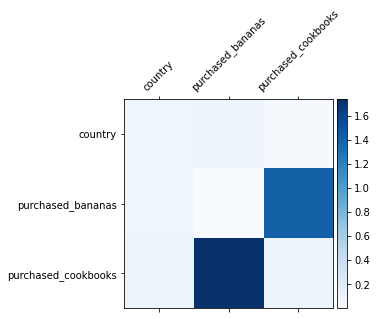

In [36]:
mat = crossnet._model._dense.kernel
features = ["country", "purchased_bananas", "purchased_cookbooks"]

plt.figure(figsize=(9,9))
im = plt.matshow(np.abs(mat.numpy()), cmap=plt.cm.Blues)
ax = plt.gca()
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
cax.tick_params(labelsize=10) 
_ = ax.set_xticklabels([''] + features, rotation=45, fontsize=10)
_ = ax.set_yticklabels([''] + features, fontsize=10)

Darker colours represent stronger learned interactions - in this case, it's clear that the model learned that purchasing babanas and cookbooks together is important.

If you are interested in trying out more complicated synthetic data, feel free to check out [this paper](https://arxiv.org/pdf/2008.13535.pdf).

#### Movielens 1M example
We now examine the effectiveness of DCN on a real-world dataset: Movielens 1M [[3](https://grouplens.org/datasets/movielens)]. Movielens 1M is a popular dataset for recommendation research. It predicts users' movie ratings given user-related features and movie-related features. We use this dataset to demonstrate some common ways to utilize DCN.

### Data processing

The data processing procedure follows a similar procedure as the [basic ranking tutorial](https://www.tensorflow.org/recommenders/examples/basic_ranking).

In [37]:
ratings = tfds.load("movie_lens/100k-ratings", split="train")
ratings = ratings.map(lambda x: {
    "movie_id": x["movie_id"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"],
    "user_gender": int(x["user_gender"]),
    "user_zip_code": x["user_zip_code"],
    "user_occupation_text": x["user_occupation_text"],
    "bucketized_user_age": int(x["bucketized_user_age"]),
})

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movie_lens/100k-ratings/0.1.0.incompleteAK13X4/movie_lens-train.tfrecord*.…

Dataset movie_lens downloaded and prepared to /root/tensorflow_datasets/movie_lens/100k-ratings/0.1.0. Subsequent calls will reuse this data.


Next, we randomly split the data into 80% for training and 20% for testing.


In [38]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

Then, we create vocabulary for each feature.

In [39]:
feature_names = ["movie_id", "user_id", "user_gender", "user_zip_code",
                 "user_occupation_text", "bucketized_user_age"]

vocabularies = {}

for feature_name in feature_names:
  vocab = ratings.batch(1_000_000).map(lambda x: x[feature_name])
  vocabularies[feature_name] = np.unique(np.concatenate(list(vocab)))

#### Model construction

The model architecture we will be building starts with an embedding layer, which is fed into a cross network followed by a deep network. The embedding dimension is set to 32 for all the features. You could also use different embedding sizes for different features.

In [40]:
class DCN(tfrs.Model):

  def __init__(self, use_cross_layer, deep_layer_sizes, projection_dim=None):
    super().__init__()

    self.embedding_dimension = 32

    str_features = ["movie_id", "user_id", "user_zip_code",
                    "user_occupation_text"]
    int_features = ["user_gender", "bucketized_user_age"]

    self._all_features = str_features + int_features
    self._embeddings = {}

    # Compute embeddings for string features.
    for feature_name in str_features:
      vocabulary = vocabularies[feature_name]
      self._embeddings[feature_name] = tf.keras.Sequential(
          [tf.keras.layers.StringLookup(
              vocabulary=vocabulary, mask_token=None),
           tf.keras.layers.Embedding(len(vocabulary) + 1,
                                     self.embedding_dimension)
    ])
      
    # Compute embeddings for int features.
    for feature_name in int_features:
      vocabulary = vocabularies[feature_name]
      self._embeddings[feature_name] = tf.keras.Sequential(
          [tf.keras.layers.IntegerLookup(
              vocabulary=vocabulary, mask_value=None),
           tf.keras.layers.Embedding(len(vocabulary) + 1,
                                     self.embedding_dimension)
    ])

    if use_cross_layer:
      self._cross_layer = tfrs.layers.dcn.Cross(
          projection_dim=projection_dim,
          kernel_initializer="glorot_uniform")
    else:
      self._cross_layer = None

    self._deep_layers = [tf.keras.layers.Dense(layer_size, activation="relu")
      for layer_size in deep_layer_sizes]

    self._logit_layer = tf.keras.layers.Dense(1)

    self.task = tfrs.tasks.Ranking(
      loss=tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError("RMSE")]
    )

  def call(self, features):
    # Concatenate embeddings
    embeddings = []
    for feature_name in self._all_features:
      embedding_fn = self._embeddings[feature_name]
      embeddings.append(embedding_fn(features[feature_name]))

    x = tf.concat(embeddings, axis=1)

    # Build Cross Network
    if self._cross_layer is not None:
      x = self._cross_layer(x)
    
    # Build Deep Network
    for deep_layer in self._deep_layers:
      x = deep_layer(x)

    return self._logit_layer(x)

  def compute_loss(self, features, training=False):
    labels = features.pop("user_rating")
    scores = self(features)
    return self.task(
        labels=labels,
        predictions=scores,
    )

### Model training
We shuffle, batch and cache the training and test data. 


In [41]:
cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()

Let's define a function that runs a model multiple times and returns the model's RMSE mean and standard deviation out of multiple runs.

In [42]:
def run_models(use_cross_layer, deep_layer_sizes, projection_dim=None, num_runs=5):
  models = []
  rmses = []

  for i in range(num_runs):
    model = DCN(use_cross_layer=use_cross_layer,
                deep_layer_sizes=deep_layer_sizes,
                projection_dim=projection_dim)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate))
    models.append(model)

    model.fit(cached_train, epochs=epochs, verbose=False)
    metrics = model.evaluate(cached_test, return_dict=True)
    rmses.append(metrics["RMSE"])

  mean, stdv = np.average(rmses), np.std(rmses)

  return {"model": models, "mean": mean, "stdv": stdv}

We set some hyper-parameters for the models. Note that these hyper-parameters are set globally for all the models for demonstration purpose. If you want to obtain the best performance for each model, or conduct a fair comparison among models, then we'd suggest you to fine-tune the hyper-parameters. Remember that the model architecture and optimization schemes are intertwined.

In [43]:
epochs = 8
learning_rate = 0.01

**DCN (stacked).** We first train a DCN model with a stacked structure, that is, the inputs are fed to a cross network followed by a deep network.
<div>
<center>
<img src="http://drive.google.com/uc?export=view&id=1X8qoMtIYKJz4yBYifvfw4QpAwrjr70e_" width="140"/>
</center>
</div>


In [44]:
dcn_result = run_models(use_cross_layer=True,
                        deep_layer_sizes=[192, 192])

5/5 [==============================] - 0s 5ms/step - RMSE: 0.9339 - loss: 0.8729 - regularization_loss: 0.0000e+00 - total_loss: 0.8729


**Low-rank DCN.** To reduce the training and serving cost, we leverage low-rank techniques to approximate the DCN weight matrices. The rank is passed in through argument `projection_dim`; a smaller `projection_dim` results in a lower cost. Note that `projection_dim` needs to be smaller than (input size)/2 to reduce the cost. In practice, we've observed using low-rank DCN with rank (input size)/4 consistently preserved the accuracy of a full-rank DCN.

<div>
<center>
<img src="http://drive.google.com/uc?export=view&id=1ZZfUTNdxjGAaAuwNrweKkLJ1PGxMmiCm" width="400"/>
</center>
</div>


In [45]:
dcn_lr_result = run_models(use_cross_layer=True,
                           projection_dim=20,
                           deep_layer_sizes=[192, 192])

5/5 [==============================] - 0s 5ms/step - RMSE: 0.9300 - loss: 0.8657 - regularization_loss: 0.0000e+00 - total_loss: 0.8657


**DNN.** We train a same-sized DNN model as a reference.

In [46]:
dnn_result = run_models(use_cross_layer=False,
                        deep_layer_sizes=[192, 192, 192])

5/5 [==============================] - 0s 4ms/step - RMSE: 0.9377 - loss: 0.8798 - regularization_loss: 0.0000e+00 - total_loss: 0.8798


We evaluate the model on test data and report the mean and standard deviation out of 5 runs.

In [47]:
print("DCN            RMSE mean: {:.4f}, stdv: {:.4f}".format(
    dcn_result["mean"], dcn_result["stdv"]))
print("DCN (low-rank) RMSE mean: {:.4f}, stdv: {:.4f}".format(
    dcn_lr_result["mean"], dcn_lr_result["stdv"]))
print("DNN            RMSE mean: {:.4f}, stdv: {:.4f}".format(
    dnn_result["mean"], dnn_result["stdv"]))


DCN            RMSE mean: 0.9334, stdv: 0.0013
DCN (low-rank) RMSE mean: 0.9312, stdv: 0.0013
DNN            RMSE mean: 0.9388, stdv: 0.0039


We see that DCN achieved better performance than a same-sized DNN with ReLU layers. Moreover, the low-rank DCN was able to reduce parameters while maintaining the accuracy.

**More on DCN.** Besides what've been demonstrated above, there are more creative yet practically useful ways to utilize DCN [[1](https://arxiv.org/pdf/2008.13535.pdf)]. 

*   *DCN with a parallel structure*.  The inputs are fed in parallel to a cross network and a deep network.

*   *Concatenating cross layers.* The inputs are fed in parallel to multiple cross layers to capture complementary feature crosses.

<div class="fig figcenter fighighlight">
<center>
  <img src="http://drive.google.com/uc?export=view&id=11RpNuj9s0OgSav9TUuGA7v7PuFLL6nVR" hspace=40 width="600" style="display:block;">
  <div class="figcaption">
  <b>Left</b>: DCN with a parallel structure; <b>Right</b>: Concatenating cross layers. 
  </div>
  </center>
</div>

#### Model understanding

The weight matrix $W$ in DCN reveals what feature crosses the model has learned to be important. Recall that in the previous toy example, the importance of interactions between the $i$-th and $j$-th features is captured by the ($i, j$)-th element of $W$.

What's a bit different here is that the feature embeddings are of size 32 instead of size 1. Hence, the importance will be characterized by the $(i, j)$-th block
$W_{i,j}$ which is of dimension 32 by 32.
In the following, we visualize the Frobenius norm [[4](https://en.wikipedia.org/wiki/Matrix_norm)] $||W_{i,j}||_F$ of each block, and a larger norm would suggest higher importance (assuming the features' embeddings are of similar scales).

Besides block norm, we could also visualize the entire matrix, or the mean/median/max value of each block.

<Figure size 648x648 with 0 Axes>

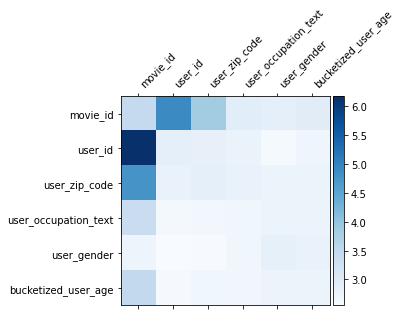

In [48]:
model = dcn_result["model"][0]
mat = model._cross_layer._dense.kernel
features = model._all_features

block_norm = np.ones([len(features), len(features)])

dim = model.embedding_dimension

# Compute the norms of the blocks.
for i in range(len(features)):
  for j in range(len(features)):
    block = mat[i * dim:(i + 1) * dim,
                j * dim:(j + 1) * dim]
    block_norm[i,j] = np.linalg.norm(block, ord="fro")

plt.figure(figsize=(9,9))
im = plt.matshow(block_norm, cmap=plt.cm.Blues)
ax = plt.gca()
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
cax.tick_params(labelsize=10) 
_ = ax.set_xticklabels([""] + features, rotation=45, ha="left", fontsize=10)
_ = ax.set_yticklabels([""] + features, fontsize=10)

That's all for this colab! We hope that you have enjoyed learning some basics of DCN and common ways to utilize it. If you are interested in learning more, you could check out two relevant papers: [DCN-v1-paper](https://arxiv.org/pdf/1708.05123.pdf), [DCN-v2-paper](https://arxiv.org/pdf/2008.13535.pdf).

# C. Sequential Model

#### Setup

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### When to use a Sequential model

A `Sequential` model is appropriate for **a plain stack of layers**
where each layer has **exactly one input tensor and one output tensor**.

Schematically, the following `Sequential` model:

In [68]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

is equivalent to this function:

In [69]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

A Sequential model is **not appropriate** when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch
model)

#### Creating a Sequential model

You can create a Sequential model by passing a list of layers to the Sequential
constructor:

In [70]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

Its layers are accessible via the `layers` attribute:

In [71]:
model.layers

You can also create a Sequential model incrementally via the `add()` method:

In [72]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

Note that there's also a corresponding `pop()` method to remove layers:
a Sequential model behaves very much like a list of layers.

In [73]:
model.pop()
print(len(model.layers))  # 2

2


Also note that the Sequential constructor accepts a `name` argument, just like
any layer or model in Keras. This is useful to annotate TensorBoard graphs
with semantically meaningful names.

In [74]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

#### Specifying the input shape in advance

Generally, all layers in Keras need to know the shape of their inputs
in order to be able to create their weights. So when you create a layer like
this, initially, it has no weights:

In [75]:
layer = layers.Dense(3)
layer.weights  # Empty

[]

It creates its weights the first time it is called on an input, since the shape
of the weights depends on the shape of the inputs:

In [76]:
# Call layer on a test input
x = tf.ones((1, 4))
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<tf.Variable 'dense_76/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.51487696, -0.1075893 , -0.43510503],
        [-0.48847798,  0.09810245, -0.47101802],
        [ 0.75279546, -0.29878223,  0.8335779 ],
        [ 0.22978544, -0.11131972, -0.07677239]], dtype=float32)>,
 <tf.Variable 'dense_76/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

Naturally, this also applies to Sequential models. When you instantiate a
Sequential model without an input shape, it isn't "built": it has no weights
(and calling
`model.weights` results in an error stating just this). The weights are created
when the model first sees some input data:

In [77]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
# model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Number of weights after calling the model: 6


Once a model is "built", you can call its `summary()` method to display its
contents:

In [78]:
model.summary()

Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (1, 2)                    10        
                                                                 
 dense_78 (Dense)            (1, 3)                    9         
                                                                 
 dense_79 (Dense)            (1, 4)                    16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


However, it can be very useful when building a Sequential model incrementally
to be able to display the summary of the model so far, including the current
output shape. In this case, you should start your model by passing an `Input`
object to your model, so that it knows its input shape from the start:

In [79]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Note that the `Input` object is not displayed as part of `model.layers`, since
it isn't a layer:

In [80]:
model.layers

A simple alternative is to just pass an `input_shape` argument to your first
layer:

In [81]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

model.summary()

Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Models built with a predefined input shape like this always have weights (even
before seeing any data) and always have a defined output shape.

In general, it's a recommended best practice to always specify the input shape
of a Sequential model in advance if you know what it is.

#### A common debugging workflow: `add()` + `summary()`

When building a new Sequential architecture, it's useful to incrementally stack
layers with `add()` and frequently print model summaries. For instance, this
enables you to monitor how a stack of `Conv2D` and `MaxPooling2D` layers is
downsampling image feature maps:

In [82]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 123, 123, 32)      2432      
                                                                 
 conv2d_15 (Conv2D)          (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 123, 123, 32)      2432      
                        

Very practical, right?


#### What to do once you have a model

Once your model architecture is ready, you will want to:

- Train your model, evaluate it, and run inference. See our
[guide to training & evaluation with the built-in loops](
https://www.tensorflow.org/guide/keras/train_and_evaluate/)
- Save your model to disk and restore it. See our
[guide to serialization & saving](https://www.tensorflow.org/guide/keras/save_and_serialize/).
- Speed up model training by leveraging multiple GPUs. See our
[guide to multi-GPU and distributed training](https://keras.io/guides/distributed_training/).

#### Feature extraction with a Sequential model

Once a Sequential model has been built, it behaves like a [Functional API
model](https://www.tensorflow.org/guide/keras/functional/). This means that every layer has an `input`
and `output` attribute. These attributes can be used to do neat things, like
quickly
creating a model that extracts the outputs of all intermediate layers in a
Sequential model:

In [83]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

Here's a similar example that only extract features from one layer:

In [84]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu", name="my_intermediate_layer"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.get_layer(name="my_intermediate_layer").output,
)
# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

#### Transfer learning with a Sequential model

Transfer learning consists of freezing the bottom layers in a model and only training
the top layers. If you aren't familiar with it, make sure to read our [guide
to transfer learning](https://www.tensorflow.org/guide/keras/transfer_learning/).

Here are two common transfer learning blueprint involving Sequential models.

First, let's say that you have a Sequential model, and you want to freeze all
layers except the last one. In this case, you would simply iterate over
`model.layers` and set `layer.trainable = False` on each layer, except the
last one. Like this:

```python
model = keras.Sequential([
    keras.Input(shape=(784)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10),
])

# Presumably you would want to first load pre-trained weights.
model.load_weights(...)

# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

# Recompile and train (this will only update the weights of the last layer).
model.compile(...)
model.fit(...)
```

Another common blueprint is to use a Sequential model to stack a pre-trained
model and some freshly initialized classification layers. Like this:

```python
# Load a convolutional base with pre-trained weights
base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg')

# Freeze the base model
base_model.trainable = False

# Use a Sequential model to add a trainable classifier on top
model = keras.Sequential([
    base_model,
    layers.Dense(1000),
])

# Compile & train
model.compile(...)
model.fit(...)
```

If you do transfer learning, you will probably find yourself frequently using
these two patterns.

That's about all you need to know about Sequential models!

To find out more about building models in Keras, see:

- [Guide to the Functional API](https://www.tensorflow.org/guide/keras/functional/)
- [Guide to making new Layers & Models via subclassing](
https://www.tensorflow.org/guide/keras/custom_layers_and_models/)

# D. Deep recurrent networks for embeddings generation

#### Sentiment Analysis with an RNN

In this notebook, you'll implement a recurrent neural network that performs sentiment analysis. 
>Using an RNN rather than a strictly feedforward network is more accurate since we can include information about the *sequence* of words. 

Here we'll use a dataset of movie reviews, accompanied by sentiment labels: positive or negative.

<img src="https://github.com/agungsantoso/deep-learning-v2-pytorch/blob/master/sentiment-rnn/assets/reviews_ex.png?raw=1" width=40%>

### Network Architecture

The architecture for this network is shown below.

<img src="https://github.com/agungsantoso/deep-learning-v2-pytorch/blob/master/sentiment-rnn/assets/network_diagram.png?raw=1" width=40%>

>**First, we'll pass in words to an embedding layer.** We need an embedding layer because we have tens of thousands of words, so we'll need a more efficient representation for our input data than one-hot encoded vectors. You should have seen this before from the Word2Vec lesson. You can actually train an embedding with the Skip-gram Word2Vec model and use those embeddings as input, here. However, it's good enough to just have an embedding layer and let the network learn a different embedding table on its own. *In this case, the embedding layer is for dimensionality reduction, rather than for learning semantic representations.*

>**After input words are passed to an embedding layer, the new embeddings will be passed to LSTM cells.** The LSTM cells will add *recurrent* connections to the network and give us the ability to include information about the *sequence* of words in the movie review data. 

>**Finally, the LSTM outputs will go to a sigmoid output layer.** We're using a sigmoid function because positive and negative = 1 and 0, respectively, and a sigmoid will output predicted, sentiment values between 0-1. 

We don't care about the sigmoid outputs except for the **very last one**; we can ignore the rest. We'll calculate the loss by comparing the output at the last time step and the training label (pos or neg).

---
#### Load in and visualize the data

In [116]:
!mkdir data
!wget -c https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/sentiment-rnn/data/labels.txt
!wget -c https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/sentiment-rnn/data/reviews.txt
!mv *.txt data/

mkdir: cannot create directory ‘data’: File exists
--2022-05-22 02:45:16--  https://github.com/agungsantoso/deep-learning-v2-pytorch/raw/master/sentiment-rnn/data/labels.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/agungsantoso/deep-learning-v2-pytorch/master/sentiment-rnn/data/labels.txt [following]
--2022-05-22 02:45:16--  https://raw.githubusercontent.com/agungsantoso/deep-learning-v2-pytorch/master/sentiment-rnn/data/labels.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225000 (220K) [text/plain]
Saving to: ‘labels.txt’

labels.txt          100%[===================>] 219.73K  --.

In [117]:
import numpy as np

# read data from text files
with open('data/reviews.txt', 'r') as f:
    reviews = f.read()
with open('data/labels.txt', 'r') as f:
    labels = f.read()

In [118]:
print(reviews[:2000])
print()
print(labels[:20])

bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turn

#### Data pre-processing

The first step when building a neural network model is getting your data into the proper form to feed into the network. Since we're using embedding layers, we'll need to encode each word with an integer. We'll also want to clean it up a bit.

You can see an example of the reviews data above. Here are the processing steps, we'll want to take:
>* We'll want to get rid of periods and extraneous punctuation.
* Also, you might notice that the reviews are delimited with newline characters `\n`. To deal with those, I'm going to split the text into each review using `\n` as the delimiter. 
* Then I can combined all the reviews back together into one big string.

First, let's remove all punctuation. Then get all the text without the newlines and split it into individual words.

In [119]:
from string import punctuation

print(punctuation)

# get rid of punctuation
reviews = reviews.lower() # lowercase, standardize
all_text = ''.join([c for c in reviews if c not in punctuation])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [120]:
# split by new lines and spaces
reviews_split = all_text.split('\n')
all_text = ' '.join(reviews_split)

# create a list of words
words = all_text.split()

In [121]:
words[:30]

['bromwell',
 'high',
 'is',
 'a',
 'cartoon',
 'comedy',
 'it',
 'ran',
 'at',
 'the',
 'same',
 'time',
 'as',
 'some',
 'other',
 'programs',
 'about',
 'school',
 'life',
 'such',
 'as',
 'teachers',
 'my',
 'years',
 'in',
 'the',
 'teaching',
 'profession',
 'lead',
 'me']

#### Encoding the words

The embedding lookup requires that we pass in integers to our network. The easiest way to do this is to create dictionaries that map the words in the vocabulary to integers. Then we can convert each of our reviews into integers so they can be passed into the network.

> **Exercise:** Now you're going to encode the words with integers. Build a dictionary that maps words to integers. Later we're going to pad our input vectors with zeros, so make sure the integers **start at 1, not 0**.
> Also, convert the reviews to integers and store the reviews in a new list called `reviews_ints`. 

In [122]:
# feel free to use this import 
from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab,1)} 

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
reviews_ints = []
for review in reviews_split:
  reviews_ints.append([vocab_to_int[word] for word in review.split()])

**Test your code**

As a text that you've implemented the dictionary correctly, print out the number of unique words in your vocabulary and the contents of the first, tokenized review.

In [123]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))  # should ~ 74000+
print()

# print tokens in first review
print('Tokenized review: \n', reviews_ints[:1])

Unique words:  74072

Tokenized review: 
 [[21025, 308, 6, 3, 1050, 207, 8, 2138, 32, 1, 171, 57, 15, 49, 81, 5785, 44, 382, 110, 140, 15, 5194, 60, 154, 9, 1, 4975, 5852, 475, 71, 5, 260, 12, 21025, 308, 13, 1978, 6, 74, 2395, 5, 613, 73, 6, 5194, 1, 24103, 5, 1983, 10166, 1, 5786, 1499, 36, 51, 66, 204, 145, 67, 1199, 5194, 19869, 1, 37442, 4, 1, 221, 883, 31, 2988, 71, 4, 1, 5787, 10, 686, 2, 67, 1499, 54, 10, 216, 1, 383, 9, 62, 3, 1406, 3686, 783, 5, 3483, 180, 1, 382, 10, 1212, 13583, 32, 308, 3, 349, 341, 2913, 10, 143, 127, 5, 7690, 30, 4, 129, 5194, 1406, 2326, 5, 21025, 308, 10, 528, 12, 109, 1448, 4, 60, 543, 102, 12, 21025, 308, 6, 227, 4146, 48, 3, 2211, 12, 8, 215, 23]]


#### Encoding the labels

Our labels are "positive" or "negative". To use these labels in our network, we need to convert them to 0 and 1.

> **Exercise:** Convert labels from `positive` and `negative` to 1 and 0, respectively, and place those in a new list, `encoded_labels`.

In [124]:
# 1=positive, 0=negative label conversion
labels_split = labels.split('\n')
encoded_labels = np.array([1 if label == 'positive' else 0 for label in labels_split])

#### Removing Outliers

As an additional pre-processing step, we want to make sure that our reviews are in good shape for standard processing. That is, our network will expect a standard input text size, and so, we'll want to shape our reviews into a specific length. We'll approach this task in two main steps:

1. Getting rid of extremely long or short reviews; the outliers
2. Padding/truncating the remaining data so that we have reviews of the same length.

<img src="https://github.com/agungsantoso/deep-learning-v2-pytorch/blob/master/sentiment-rnn/assets/outliers_padding_ex.png?raw=1" width=40%>

Before we pad our review text, we should check for reviews of extremely short or long lengths; outliers that may mess with our training.

In [125]:
# outlier review stats
review_lens = Counter([len(x) for x in reviews_ints])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))

Zero-length reviews: 1
Maximum review length: 2514


Okay, a couple issues here. We seem to have one review with zero length. And, the maximum review length is way too many steps for our RNN. We'll have to remove any super short reviews and truncate super long reviews. This removes outliers and should allow our model to train more efficiently.

> **Exercise:** First, remove *any* reviews with zero length from the `reviews_ints` list and their corresponding label in `encoded_labels`.

In [126]:
print('Number of reviews before removing outliers: ', len(reviews_ints))

## remove any reviews/labels with zero length from the reviews_ints list.

## get any indices of any reviews with length 0
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]

# remove 0-length review with their labels
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(reviews_ints))

Number of reviews before removing outliers:  25001
Number of reviews after removing outliers:  25000


---
#### Padding sequences

To deal with both short and very long reviews, we'll pad or truncate all our reviews to a specific length. For reviews shorter than some `seq_length`, we'll pad with 0s. For reviews longer than `seq_length`, we can truncate them to the first `seq_length` words. A good `seq_length`, in this case, is 200.

> **Exercise:** Define a function that returns an array `features` that contains the padded data, of a standard size, that we'll pass to the network. 
* The data should come from `review_ints`, since we want to feed integers to the network. 
* Each row should be `seq_length` elements long. 
* For reviews shorter than `seq_length` words, **left pad** with 0s. That is, if the review is `['best', 'movie', 'ever']`, `[117, 18, 128]` as integers, the row will look like `[0, 0, 0, ..., 0, 117, 18, 128]`. 
* For reviews longer than `seq_length`, use only the first `seq_length` words as the feature vector.

As a small example, if the `seq_length=10` and an input review is: 
```
[117, 18, 128]
```
The resultant, padded sequence should be: 

```
[0, 0, 0, 0, 0, 0, 0, 117, 18, 128]
```

**Your final `features` array should be a 2D array, with as many rows as there are reviews, and as many columns as the specified `seq_length`.**

This isn't trivial and there are a bunch of ways to do this. But, if you're going to be building your own deep learning networks, you're going to have to get used to preparing your data.

In [127]:
def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    ## getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)
    
    ## for each review, I grab that review
    for i, row in enumerate(reviews_ints):
      features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [128]:
# Test your implementation!

seq_length = 200

features = pad_features(reviews_ints, seq_length=seq_length)

## test statements - do not change - ##
assert len(features)==len(reviews_ints), "Your features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features[:30,:10])

[[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [22382    42 46418    15   706 17139  3389    47    77    35]
 [ 4505   505    15     3  3342   162  8312  1652     6  4819]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [   54    10    14   116    60   798   552    71   364     5]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    1   330   578    34     3   162   748  2731     9   325]
 [    9    11 10171  5305  1946   689   444    22   280   673]
 [    0     0     0     0     0     0     0     0     0

#### Training, Validation, Test

With our data in nice shape, we'll split it into training, validation, and test sets.

> **Exercise:** Create the training, validation, and test sets. 
* You'll need to create sets for the features and the labels, `train_x` and `train_y`, for example. 
* Define a split fraction, `split_frac` as the fraction of data to **keep** in the training set. Usually this is set to 0.8 or 0.9. 
* Whatever data is left will be split in half to create the validation and *testing* data.

In [129]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)
split_idx = int(len(features)*0.8)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeatures Shapes:")
print("Train set: \t\t{}".format(train_x.shape),
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))



			Features Shapes:
Train set: 		(20000, 200) 
Validation set: 	(2500, 200) 
Test set: 		(2500, 200)


**Check your work**

With train, validation, and test fractions equal to 0.8, 0.1, 0.1, respectively, the final, feature data shapes should look like:
```
                    Feature Shapes:
Train set: 		 (20000, 200) 
Validation set: 	(2500, 200) 
Test set: 		  (2500, 200)
```

---
#### DataLoaders and Batching

After creating training, test, and validation data, we can create DataLoaders for this data by following two steps:
1. Create a known format for accessing our data, using [TensorDataset](https://pytorch.org/docs/stable/data.html#) which takes in an input set of data and a target set of data with the same first dimension, and creates a dataset.
2. Create DataLoaders and batch our training, validation, and test Tensor datasets.

```
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
train_loader = DataLoader(train_data, batch_size=batch_size)
```

This is an alternative to creating a generator function for batching our data into full batches.

In [130]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [131]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[   0,    0,    0,  ...,  353,    1,   18],
        [   8,    6,    3,  ..., 3835,   17,  109],
        [   0,    0,    0,  ...,  202, 1115,  331],
        ...,
        [   0,    0,    0,  ...,    9,    1, 1746],
        [  10, 2138,  626,  ...,   43,  141,   44],
        [  10,  143,   24,  ..., 3689, 1971, 2250]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1])


---
#### Sentiment Network with PyTorch

Below is where you'll define the network.

<img src="https://github.com/agungsantoso/deep-learning-v2-pytorch/blob/master/sentiment-rnn/assets/network_diagram.png?raw=1" width=40%>

The layers are as follows:
1. An [embedding layer](https://pytorch.org/docs/stable/nn.html#embedding) that converts our word tokens (integers) into embeddings of a specific size.
2. An [LSTM layer](https://pytorch.org/docs/stable/nn.html#lstm) defined by a hidden_state size and number of layers
3. A fully-connected output layer that maps the LSTM layer outputs to a desired output_size
4. A sigmoid activation layer which turns all outputs into a value 0-1; return **only the last sigmoid output** as the output of this network.

### The Embedding Layer

We need to add an [embedding layer](https://pytorch.org/docs/stable/nn.html#embedding) because there are 74000+ words in our vocabulary. It is massively inefficient to one-hot encode that many classes. So, instead of one-hot encoding, we can have an embedding layer and use that layer as a lookup table. You could train an embedding layer using Word2Vec, then load it here. But, it's fine to just make a new layer, using it for only dimensionality reduction, and let the network learn the weights.


### The LSTM Layer(s)

We'll create an [LSTM](https://pytorch.org/docs/stable/nn.html#lstm) to use in our recurrent network, which takes in an input_size, a hidden_dim, a number of layers, a dropout probability (for dropout between multiple layers), and a batch_first parameter.

Most of the time, you're network will have better performance with more layers; between 2-3. Adding more layers allows the network to learn really complex relationships. 

> **Exercise:** Complete the `__init__`, `forward`, and `init_hidden` functions for the SentimentRNN model class.

Note: `init_hidden` should initialize the hidden and cell state of an lstm layer to all zeros, and move those state to GPU, if available.

In [132]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [133]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layer
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
        
        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if(train_on_gpu):
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                   weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

#### Instantiate the network

Here, we'll instantiate the network. First up, defining the hyperparameters.

* `vocab_size`: Size of our vocabulary or the range of values for our input, word tokens.
* `output_size`: Size of our desired output; the number of class scores we want to output (pos/neg).
* `embedding_dim`: Number of columns in the embedding lookup table; size of our embeddings.
* `hidden_dim`: Number of units in the hidden layers of our LSTM cells. Usually larger is better performance wise. Common values are 128, 256, 512, etc.
* `n_layers`: Number of LSTM layers in the network. Typically between 1-3

> **Exercise:** Define the model  hyperparameters.


In [134]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int) + 1 # +1 for zero padding + our word tokens
output_size = 1
embedding_dim = 400 
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(74073, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


---
#### Training

Below is the typical training code. If you want to do this yourself, feel free to delete all this code and implement it yourself. You can also add code to save a model by name.

>We'll also be using a new kind of cross entropy loss, which is designed to work with a single Sigmoid output. [BCELoss](https://pytorch.org/docs/stable/nn.html#bceloss), or **Binary Cross Entropy Loss**, applies cross entropy loss to a single value between 0 and 1.

We also have some data and training hyparameters:

* `lr`: Learning rate for our optimizer.
* `epochs`: Number of times to iterate through the training dataset.
* `clip`: The maximum gradient value to clip at (to prevent exploding gradients).

In [135]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


In [136]:
# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.640965... Val Loss: 0.647496
Epoch: 1/4... Step: 200... Loss: 0.661918... Val Loss: 0.606017
Epoch: 1/4... Step: 300... Loss: 0.721179... Val Loss: 0.580355
Epoch: 1/4... Step: 400... Loss: 0.677090... Val Loss: 0.621904
Epoch: 2/4... Step: 500... Loss: 0.472607... Val Loss: 0.597648
Epoch: 2/4... Step: 600... Loss: 0.323077... Val Loss: 0.479886
Epoch: 2/4... Step: 700... Loss: 0.333038... Val Loss: 0.551359
Epoch: 2/4... Step: 800... Loss: 0.358846... Val Loss: 0.531486
Epoch: 3/4... Step: 900... Loss: 0.371785... Val Loss: 0.511193
Epoch: 3/4... Step: 1000... Loss: 0.197691... Val Loss: 0.456769
Epoch: 3/4... Step: 1100... Loss: 0.232773... Val Loss: 0.462393
Epoch: 3/4... Step: 1200... Loss: 0.253858... Val Loss: 0.451629
Epoch: 4/4... Step: 1300... Loss: 0.245260... Val Loss: 0.480805
Epoch: 4/4... Step: 1400... Loss: 0.177935... Val Loss: 0.511626
Epoch: 4/4... Step: 1500... Loss: 0.262937... Val Loss: 0.556524
Epoch: 4/4... Step: 1600... Loss: 

---
#### Testing

There are a few ways to test your network.

* **Test data performance:** First, we'll see how our trained model performs on all of our defined test_data, above. We'll calculate the average loss and accuracy over the test data.

* **Inference on user-generated data:** Second, we'll see if we can input just one example review at a time (without a label), and see what the trained model predicts. Looking at new, user input data like this, and predicting an output label, is called **inference**.

In [137]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.504
Test accuracy: 0.807


#### Inference on a test review

You can change this test_review to any text that you want. Read it and think: is it pos or neg? Then see if your model predicts correctly!
    
> **Exercise:** Write a `predict` function that takes in a trained net, a plain text_review, and a sequence length, and prints out a custom statement for a positive or negative review!
* You can use any functions that you've already defined or define any helper functions you want to complete `predict`, but it should just take in a trained net, a text review, and a sequence length.


In [138]:
# negative test review
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'


In [139]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuatuon
    test_text = ''.join([c for c in test_review if c not in punctuation])
    
    # splitting by spaces
    test_words = test_text.split()
    
    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])
    
    return test_ints
  
# test code and generate tokenized review
test_ints = tokenize_review(test_review_neg)
print(test_ints)

[[1, 247, 18, 10, 28, 108, 113, 14, 388, 2, 10, 181, 60, 273, 144, 11, 18, 68, 76, 113, 2, 1, 410, 14, 539]]


In [140]:
# test sequence padding
seq_length = 200
features = pad_features(test_ints, seq_length)

print(features)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   1 247  18  10  28
  108 113  14 388   2  10 181  60 273 144  11  18  68  76 113   2   1 410
   14 539]]


In [141]:
# test conversion to tensor and pass it to model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())

torch.Size([1, 200])


In [142]:
def predict(net, test_review, sequence_length=200):
    ''' Prints out whether a give review is predicted to be 
        positive or negative in sentiment, using a trained model.
        
        params:
        net - A trained net 
        test_review - a review made of normal text and punctuation
        sequence_length - the padded length of a review
        '''
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenize sequence
    seq_length = sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass to model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
      feature_tensor = feature_tensor.cuda()
      
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response based on whether test_review is pos/neg
    if(pred.item()==1):
      print('Positive review detected!')
    else:
      print('Negative review detected!')
    
        

In [143]:
# positive test review
test_review_pos = 'This movie had the best acting and the dialogue was so good. I loved it.'


In [144]:
# call function
# try negative and positive reviews!
seq_length=200
predict(net, test_review_neg, seq_length)
predict(net, test_review_pos, seq_length)

Prediction value, pre-rounding: 0.005819
Negative review detected!
Prediction value, pre-rounding: 0.975193
Positive review detected!


#### Try out test_reviews of your own!

Now that you have a trained model and a predict function, you can pass in _any_ kind of text and this model will predict whether the text has a positive or negative sentiment. Push this model to its limits and try to find what words it associates with positive or negative.

Later, you'll learn how to deploy a model like this to a production environment so that it can respond to any kind of user data put into a web app!

# E. Deep Ranking

In [150]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets
!pip install -q tensorflow-ranking

In [151]:
import pprint

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [152]:
import tensorflow_ranking as tfr
import tensorflow_recommenders as tfrs

In [153]:
ratings = tfds.load("movielens/100k-ratings", split="train")
movies = tfds.load("movielens/100k-movies", split="train")

ratings = ratings.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"],
})
movies = movies.map(lambda x: x["movie_title"])

unique_movie_titles = np.unique(np.concatenate(list(movies.batch(1000))))
unique_user_ids = np.unique(np.concatenate(list(ratings.batch(1_000).map(
    lambda x: x["user_id"]))))

In [154]:
tf.random.set_seed(42)

# Split between train and tests sets, as before.
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

# We sample 50 lists for each user for the training data. For each list we
# sample 5 movies from the movies the user rated.
train = tfrs.examples.movielens.sample_listwise(
    train,
    num_list_per_user=50,
    num_examples_per_list=5,
    seed=42
)
test = tfrs.examples.movielens.sample_listwise(
    test,
    num_list_per_user=1,
    num_examples_per_list=5,
    seed=42
)

In [155]:
for example in train.take(1):
  pprint.pprint(example)

{'movie_title': <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Postman, The (1997)', b'Liar Liar (1997)', b'Contact (1997)',
       b'Welcome To Sarajevo (1997)',
       b'I Know What You Did Last Summer (1997)'], dtype=object)>,
 'user_id': <tf.Tensor: shape=(), dtype=string, numpy=b'681'>,
 'user_rating': <tf.Tensor: shape=(5,), dtype=float32, numpy=array([4., 5., 1., 4., 1.], dtype=float32)>}


In [156]:
class RankingModel(tfrs.Model):

  def __init__(self, loss):
    super().__init__()
    embedding_dimension = 32

    # Compute embeddings for users.
    self.user_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids),
      tf.keras.layers.Embedding(len(unique_user_ids) + 2, embedding_dimension)
    ])

    # Compute embeddings for movies.
    self.movie_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_movie_titles),
      tf.keras.layers.Embedding(len(unique_movie_titles) + 2, embedding_dimension)
    ])

    # Compute predictions.
    self.score_model = tf.keras.Sequential([
      # Learn multiple dense layers.
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      # Make rating predictions in the final layer.
      tf.keras.layers.Dense(1)
    ])

    self.task = tfrs.tasks.Ranking(
      loss=loss,
      metrics=[
        tfr.keras.metrics.NDCGMetric(name="ndcg_metric"),
        tf.keras.metrics.RootMeanSquaredError()
      ]
    )

  def call(self, features):
    # We first convert the id features into embeddings.
    # User embeddings are a [batch_size, embedding_dim] tensor.
    user_embeddings = self.user_embeddings(features["user_id"])

    # Movie embeddings are a [batch_size, num_movies_in_list, embedding_dim]
    # tensor.
    movie_embeddings = self.movie_embeddings(features["movie_title"])

    # We want to concatenate user embeddings with movie emebeddings to pass
    # them into the ranking model. To do so, we need to reshape the user
    # embeddings to match the shape of movie embeddings.
    list_length = features["movie_title"].shape[1]
    user_embedding_repeated = tf.repeat(
        tf.expand_dims(user_embeddings, 1), [list_length], axis=1)

    # Once reshaped, we concatenate and pass into the dense layers to generate
    # predictions.
    concatenated_embeddings = tf.concat(
        [user_embedding_repeated, movie_embeddings], 2)

    return self.score_model(concatenated_embeddings)

  def compute_loss(self, features, training=False):
    labels = features.pop("user_rating")

    scores = self(features)

    return self.task(
        labels=labels,
        predictions=tf.squeeze(scores, axis=-1),
    )

In [157]:
epochs = 30

cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()

In [158]:
mse_model = RankingModel(tf.keras.losses.MeanSquaredError())
mse_model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [159]:
mse_model.fit(cached_train, epochs=epochs, verbose=False)

In [160]:
hinge_model = RankingModel(tfr.keras.losses.PairwiseHingeLoss())
hinge_model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [161]:
hinge_model.fit(cached_train, epochs=epochs, verbose=False)

In [162]:
listwise_model = RankingModel(tfr.keras.losses.ListMLELoss())
listwise_model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [163]:
listwise_model.fit(cached_train, epochs=epochs, verbose=False)

In [164]:
mse_model_result = mse_model.evaluate(cached_test, return_dict=True)
print("NDCG of the MSE Model: {:.4f}".format(mse_model_result["ndcg_metric"]))

1/1 [==============================] - 0s 419ms/step - ndcg_metric: 0.9053 - root_mean_squared_error: 0.9671 - loss: 0.9354 - regularization_loss: 0.0000e+00 - total_loss: 0.9354
NDCG of the MSE Model: 0.9053


In [165]:
hinge_model_result = hinge_model.evaluate(cached_test, return_dict=True)
print("NDCG of the pairwise hinge loss model: {:.4f}".format(hinge_model_result["ndcg_metric"]))

1/1 [==============================] - 0s 464ms/step - ndcg_metric: 0.9059 - root_mean_squared_error: 3.8326 - loss: 1.0180 - regularization_loss: 0.0000e+00 - total_loss: 1.0180
NDCG of the pairwise hinge loss model: 0.9059


In [166]:
listwise_model_result = listwise_model.evaluate(cached_test, return_dict=True)
print("NDCG of the ListMLE model: {:.4f}".format(listwise_model_result["ndcg_metric"]))

1/1 [==============================] - 0s 470ms/step - ndcg_metric: 0.9072 - root_mean_squared_error: 2.7233 - loss: 4.5401 - regularization_loss: 0.0000e+00 - total_loss: 4.5401
NDCG of the ListMLE model: 0.9072


# F. Scalable deep retrieval using scann

##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#### Efficient serving

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/recommenders/examples/efficient_serving"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/recommenders/blob/main/docs/examples/efficient_serving.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/recommenders/blob/main/docs/examples/efficient_serving.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/recommenders/docs/examples/efficient_serving.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

[Retrieval models](https://www.tensorflow.org/recommenders/examples/basic_retrieval) are often built to surface a handful of top candidates out of millions or even hundreds of millions of candidates. To be able to react to the user's context and behaviour, they need to be able to do this on the fly, in a matter of milliseconds.

Approximate nearest neighbour search (ANN) is the technology that makes this possible. In this tutorial, we'll show how to use ScaNN - a state of the art nearest neighbour retrieval package - to seamlessly scale TFRS retrieval to millions of items.

## What is ScaNN?

ScaNN is a library from Google Research that performs dense vector similarity search at large scale. Given a database of candidate embeddings, ScaNN indexes these embeddings in a manner that allows them to be rapidly searched at inference time. ScaNN uses state of the art vector compression techniques and carefully implemented algorithms to achieve the best speed-accuracy tradeoff. It can greatly outperform brute force search while sacrificing little in terms of accuracy.

## Building a ScaNN-powered model

To try out ScaNN in TFRS, we'll build a simple MovieLens retrieval model, just as we did in the [basic retrieval](https://www.tensorflow.org/recommenders/examples/basic_retrieval) tutorial. If you have followed that tutorial, this section will be familiar and can safely be skipped.

To start, install TFRS and TensorFlow Datasets:

In [ ]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 462 kB 38.3 MB/s 
     |████████████████████████████████| 4.2 MB 5.1 MB/s 


We also need to install `scann`: it's an optional dependency of TFRS, and so needs to be installed separately.

In [ ]:
!pip install -q scann

     |████████████████████████████████| 10.9 MB 5.3 MB/s 


Set up all the necessary imports.

In [ ]:
from typing import Dict, Text

import os
import pprint
import tempfile

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
import tensorflow_recommenders as tfrs

And load the data:

In [ ]:
# Load the MovieLens 100K data.
ratings = tfds.load(
    "movielens/100k-ratings",
    split="train"
)

# Get the ratings data.
ratings = (ratings
           # Retain only the fields we need.
           .map(lambda x: {"user_id": x["user_id"], "movie_title": x["movie_title"]})
           # Cache for efficiency.
           .cache(tempfile.NamedTemporaryFile().name)
)

# Get the movies data.
movies = tfds.load("movielens/100k-movies", split="train")
movies = (movies
          # Retain only the fields we need.
          .map(lambda x: x["movie_title"])
          # Cache for efficiency.
          .cache(tempfile.NamedTemporaryFile().name))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/0.1.0.incompleteIIUMKA/movielens-train.tfrecord*...…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1682 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-movies/0.1.0.incompleteEZSLLA/movielens-train.tfrecord*...:…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-movies/0.1.0. Subsequent calls will reuse this data.


Before we can build a model, we need to set up the user and movie vocabularies:

In [ ]:
user_ids = ratings.map(lambda x: x["user_id"])

unique_movie_titles = np.unique(np.concatenate(list(movies.batch(1000))))
unique_user_ids = np.unique(np.concatenate(list(user_ids.batch(1000))))

We'll also set up the training and test sets:

In [ ]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

### Model definition

Just as in the [basic retrieval](https://www.tensorflow.org/recommenders/examples/basic_retrieval) tutorial, we build a simple two-tower model.

In [ ]:
class MovielensModel(tfrs.Model):

  def __init__(self):
    super().__init__()

    embedding_dimension = 32

    # Set up a model for representing movies.
    self.movie_model = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_movie_titles, mask_token=None),
      # We add an additional embedding to account for unknown tokens.
      tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
    ])

    # Set up a model for representing users.
    self.user_model = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
        # We add an additional embedding to account for unknown tokens.
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ])

    # Set up a task to optimize the model and compute metrics.
    self.task = tfrs.tasks.Retrieval(
      metrics=tfrs.metrics.FactorizedTopK(
        candidates=movies.batch(128).cache().map(self.movie_model)
      )
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    # We pick out the user features and pass them into the user model.
    user_embeddings = self.user_model(features["user_id"])
    # And pick out the movie features and pass them into the movie model,
    # getting embeddings back.
    positive_movie_embeddings = self.movie_model(features["movie_title"])

    # The task computes the loss and the metrics.

    return self.task(user_embeddings, positive_movie_embeddings, compute_metrics=not training)

### Fitting and evaluation

A TFRS model is just a Keras model. We can compile it:

In [ ]:
model = MovielensModel()
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

Estimate it:

In [ ]:
model.fit(train.batch(8192), epochs=3)

Epoch 1/3
10/10 [==============================] - 3s 46ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - loss: 69808.9680 - regularization_loss: 0.0000e+00 - total_loss: 69808.9680
Epoch 2/3
10/10 [==============================] - 1s 46ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - loss: 67485.8842 - regularization_loss: 0.0000e+00 - total_loss: 67485.8842
Epoch 3/3
10/10 [==============================] - 1s 44ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - fact

And evaluate it.

In [ ]:
model.evaluate(test.batch(8192), return_dict=True)

3/3 [==============================] - 4s 726ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0012 - factorized_top_k/top_5_categorical_accuracy: 0.0093 - factorized_top_k/top_10_categorical_accuracy: 0.0225 - factorized_top_k/top_50_categorical_accuracy: 0.1261 - factorized_top_k/top_100_categorical_accuracy: 0.2361 - loss: 49466.8750 - regularization_loss: 0.0000e+00 - total_loss: 49466.8750


{'factorized_top_k/top_100_categorical_accuracy': 0.23614999651908875,
 'factorized_top_k/top_10_categorical_accuracy': 0.02250000089406967,
 'factorized_top_k/top_1_categorical_accuracy': 0.0011500000255182385,
 'factorized_top_k/top_50_categorical_accuracy': 0.1261499971151352,
 'factorized_top_k/top_5_categorical_accuracy': 0.009349999949336052,
 'loss': 28242.83203125,
 'regularization_loss': 0,
 'total_loss': 28242.83203125}

## Approximate prediction

The most straightforward way of retrieving top candidates in response to a query is to do it via brute force: compute user-movie scores for all possible movies, sort them, and pick a couple of top recommendations.

In TFRS, this is accomplished via the `BruteForce` layer:

In [ ]:
brute_force = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
brute_force.index_from_dataset(
    movies.batch(128).map(lambda title: (title, model.movie_model(title)))
)

Once created and populated with candidates (via the `index` method), we can call it to get predictions out:

In [ ]:
# Get predictions for user 42.
_, titles = brute_force(np.array(["42"]), k=3)

print(f"Top recommendations: {titles[0]}")

Top recommendations: [b'Homeward Bound: The Incredible Journey (1993)'
 b"Kid in King Arthur's Court, A (1995)" b'Rudy (1993)']


On a small dataset of under 1000 movies, this is very fast:

In [ ]:
%timeit _, titles = brute_force(np.array(["42"]), k=3)

1000 loops, best of 5: 1.49 ms per loop


But what happens if we have more candidates - millions instead of thousands?

We can simulate this by indexing all of our movies multiple times:

In [ ]:
# Construct a dataset of movies that's 1,000 times larger. We 
# do this by adding several million dummy movie titles to the dataset.
lots_of_movies = tf.data.Dataset.concatenate(
    movies.batch(4096),
    movies.batch(4096).repeat(1_000).map(lambda x: tf.zeros_like(x))
)

# We also add lots of dummy embeddings by randomly perturbing
# the estimated embeddings for real movies.
lots_of_movies_embeddings = tf.data.Dataset.concatenate(
    movies.batch(4096).map(model.movie_model),
    movies.batch(4096).repeat(1_000)
      .map(lambda x: model.movie_model(x))
      .map(lambda x: x * tf.random.uniform(tf.shape(x)))
)

We can build a `BruteForce` index on this larger dataset:

In [ ]:
brute_force_lots = tfrs.layers.factorized_top_k.BruteForce()
brute_force_lots.index_from_dataset(
    tf.data.Dataset.zip((lots_of_movies, lots_of_movies_embeddings))
)

The recommendations are still the same

In [ ]:
_, titles = brute_force_lots(model.user_model(np.array(["42"])), k=3)

print(f"Top recommendations: {titles[0]}")

Top recommendations: [b'Homeward Bound: The Incredible Journey (1993)'
 b"Kid in King Arthur's Court, A (1995)" b'Rudy (1993)']


But they take much longer. With a candidate set of 1 million movies, brute force prediction becomes quite slow:

In [ ]:
%timeit _, titles = brute_force_lots(model.user_model(np.array(["42"])), k=3)

100 loops, best of 5: 3.12 ms per loop


As the number of candidate grows, the amount of time needed grows linearly: with 10 million candidates, serving top candidates would take 250 milliseconds. This is clearly too slow for a live service.

This is where approximate mechanisms come in.

Using ScaNN in TFRS is accomplished via the `tfrs.layers.factorized_top_k.ScaNN` layer. It follow the same interface as the other top k layers:

In [ ]:
scann = tfrs.layers.factorized_top_k.ScaNN(num_reordering_candidates=100)
scann.index_from_dataset(
    tf.data.Dataset.zip((lots_of_movies, lots_of_movies_embeddings))
)

The recommendations are (approximately!) the same

In [ ]:
_, titles = scann(model.user_model(np.array(["42"])), k=3)

print(f"Top recommendations: {titles[0]}")

Top recommendations: [b'Homeward Bound: The Incredible Journey (1993)'
 b"Kid in King Arthur's Court, A (1995)" b'Rudy (1993)']


But they are much, much faster to compute:

In [ ]:
%timeit _, titles = scann(model.user_model(np.array(["42"])), k=3)

100 loops, best of 5: 19.1 ms per loop


In this case, we can retrieve the top 3 movies out of a set of ~1 million in around 2 milliseconds: 15 times faster than by computing the best candidates via brute force. The advantage of approximate methods grows even larger for larger datasets.

## Evaluating the approximation

When using approximate top K retrieval mechanisms (such as ScaNN), speed of retrieval often comes at the expense of accuracy. To understand this trade-off, it's important to measure the model's evaluation metrics when using ScaNN, and to compare them with the baseline.

Fortunately, TFRS makes this easy. We simply override the metrics on the retrieval task with metrics using ScaNN, re-compile the model, and run evaluation.

To make the comparison, let's first run baseline results. We still need to override our metrics to make sure they are using the enlarged candidate set rather than the original set of movies:

In [ ]:
# Override the existing streaming candidate source.
model.task.factorized_metrics = tfrs.metrics.FactorizedTopK(
    candidates=lots_of_movies_embeddings
)
# Need to recompile the model for the changes to take effect.
model.compile()

%time baseline_result = model.evaluate(test.batch(8192), return_dict=True, verbose=False)

CPU times: user 16min 6s, sys: 9.52 s, total: 16min 16s
Wall time: 8min 39s


We can do the same using ScaNN:

In [ ]:
model.task.factorized_metrics = tfrs.metrics.FactorizedTopK(
    candidates=scann
)
model.compile()

# We can use a much bigger batch size here because ScaNN evaluation
# is more memory efficient.
%time scann_result = model.evaluate(test.batch(8192), return_dict=True, verbose=False)

CPU times: user 5.32 s, sys: 311 ms, total: 5.63 s
Wall time: 3.34 s


ScaNN based evaluation is much, much quicker: it's over ten times faster! This advantage is going to grow even larger for bigger datasets, and so for large datasets it may be prudent to always run ScaNN-based evaluation to improve model development velocity.

But how about the results? Fortunately, in this case the results are almost the same:


In [ ]:
print(f"Brute force top-100 accuracy: {baseline_result['factorized_top_k/top_100_categorical_accuracy']:.2f}")
print(f"ScaNN top-100 accuracy:       {scann_result['factorized_top_k/top_100_categorical_accuracy']:.2f}")

Brute force top-100 accuracy: 0.15
ScaNN top-100 accuracy:       0.27


This suggests that on this artificial datase,  there is little loss from the approximation. In general, all approximate methods exhibit speed-accuracy tradeoffs. To understand this in more depth you can check out Erik Bernhardsson's [ANN benchmarks](https://github.com/erikbern/ann-benchmarks).

## Deploying the approximate model

The `ScaNN`-based model is fully integrated into TensorFlow models, and serving it is as easy as serving any other TensorFlow model.

We can save it as a `SavedModel` object

In [ ]:
lots_of_movies_embeddings

<ConcatenateDataset element_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None)>

In [ ]:
# We re-index the ScaNN layer to include the user embeddings in the same model.
# This way we can give the saved model raw features and get valid predictions
# back.
scann = tfrs.layers.factorized_top_k.ScaNN(model.user_model, num_reordering_candidates=1000)
scann.index_from_dataset(
    tf.data.Dataset.zip((lots_of_movies, lots_of_movies_embeddings))
)

# Need to call it to set the shapes.
_ = scann(np.array(["42"]))

with tempfile.TemporaryDirectory() as tmp:
  path = os.path.join(tmp, "model")
  tf.saved_model.save(
      scann,
      path,
      options=tf.saved_model.SaveOptions(namespace_whitelist=["Scann"])
  )

  loaded = tf.saved_model.load(path)

INFO:tensorflow:Assets written to: /tmp/tmpsp4mdq3v/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpsp4mdq3v/model/assets


and then load it and serve, getting exactly the same results back:

In [ ]:
_, titles = loaded(tf.constant(["42"]))

print(f"Top recommendations: {titles[0][:3]}")

Top recommendations: [b'Homeward Bound: The Incredible Journey (1993)'
 b"Kid in King Arthur's Court, A (1995)" b'Rudy (1993)']


The resulting model can be served in any Python service that has TensorFlow and ScaNN installed.

It can also be served using a customized version of TensorFlow Serving, available as a Docker container on [Docker Hub](https://hub.docker.com/r/google/tf-serving-scann). You can also build the image yourself from the [Dockerfile](https://github.com/google-research/google-research/tree/master/scann/tf_serving).

## Tuning ScaNN

Now let's look into tuning our ScaNN layer to get a better performance/accuracy tradeoff. In order to do this effectively, we first need to measure our baseline performance and accuracy.

From above, we already have a measurement of our model's latency for processing a single (non-batched) query (although note that a fair amount of this latency is from non-ScaNN components of the model).

Now we need to investigate ScaNN's accuracy, which we measure through recall. A recall@k of x% means that if we use brute force to retrieve the true top k neighbors, and compare those results to using ScaNN to also retrieve the top k neighbors, x% of ScaNN's results are in the true brute force results. Let's compute the recall for the current ScaNN searcher.

First, we need to generate the brute force, ground truth top-k:

In [ ]:
# Process queries in groups of 1000; processing them all at once with brute force
# may lead to out-of-memory errors, because processing a batch of q queries against
# a size-n dataset takes O(nq) space with brute force.
titles_ground_truth = tf.concat([
  brute_force_lots(queries, k=10)[1] for queries in
  test.batch(1000).map(lambda x: model.user_model(x["user_id"]))
], axis=0)

Our variable `titles_ground_truth` now contains the top-10 movie recommendations returned by brute-force retrieval. Now we can compute the same recommendations when using ScaNN:

In [ ]:
# Get all user_id's as a 1d tensor of strings
test_flat = np.concatenate(list(test.map(lambda x: x["user_id"]).batch(1000).as_numpy_iterator()), axis=0)

# ScaNN is much more memory efficient and has no problem processing the whole
# batch of 20000 queries at once.
_, titles = scann(test_flat, k=10)

Next, we define our function that computes recall. For each query, it counts how many results are in the intersection of the brute force and the ScaNN results and divides this by the number of brute force results. The average of this quantity over all queries is our recall.

In [ ]:
def compute_recall(ground_truth, approx_results):
  return np.mean([
      len(np.intersect1d(truth, approx)) / len(truth)
      for truth, approx in zip(ground_truth, approx_results)
  ])

This gives us baseline recall@10 with the current ScaNN config:

In [ ]:
print(f"Recall: {compute_recall(titles_ground_truth, titles):.3f}")

Recall: 0.931


We can also measure the baseline latency:

In [ ]:
%timeit -n 1000 scann(np.array(["42"]), k=10)

1000 loops, best of 5: 19.1 ms per loop


Let's see if we can do better!

To do this, we need a model of how ScaNN's tuning knobs affect performance. Our current model uses ScaNN's tree-AH algorithm. This algorithm partitions the database of embeddings (the "tree") and then scores the most promising of these partitions using AH, which is a highly optimized approximate distance computation routine.

The default parameters for TensorFlow Recommenders' ScaNN Keras layer sets `num_leaves=100` and `num_leaves_to_search=10`. This means our database is partitioned into 100 disjoint subsets, and the 10 most promising of these partitions is scored with AH. This means 10/100=10% of the dataset is being searched with AH.

If we have, say, `num_leaves=1000` and `num_leaves_to_search=100`, we would also be searching 10% of the database with AH. However, in comparison to the previous setting, the 10% we would search will contain higher-quality candidates, because a higher `num_leaves` allows us to make finer-grained decisions about what parts of the dataset are worth searching.

It's no surprise then that with `num_leaves=1000` and `num_leaves_to_search=100` we get significantly higher recall:

In [ ]:
scann2 = tfrs.layers.factorized_top_k.ScaNN(
    model.user_model, 
    num_leaves=1000,
    num_leaves_to_search=100,
    num_reordering_candidates=1000)
scann2.index_from_dataset(
    tf.data.Dataset.zip((lots_of_movies, lots_of_movies_embeddings))
)

_, titles2 = scann2(test_flat, k=10)

print(f"Recall: {compute_recall(titles_ground_truth, titles2):.3f}")

Recall: 0.966


However, as a tradeoff, our latency has also increased. This is because the partitioning step has gotten more expensive; `scann` picks the top 10 of 100 partitions while `scann2` picks the top 100 of 1000 partitions. The latter can be more expensive because it involves looking at 10 times as many partitions.

In [ ]:
%timeit -n 1000 scann2(np.array(["42"]), k=10)

1000 loops, best of 5: 19.2 ms per loop


In general, tuning ScaNN search is about picking the right tradeoffs. Each individual parameter change generally won't make search both faster and more accurate; our goal is to tune the parameters to optimally trade off between these two conflicting goals.

In our case, `scann2` significantly improved recall over `scann` at some cost in latency. Can we dial back some other knobs to cut down on latency, while preserving most of our recall advantage?

Let's try searching 70/1000=7% of the dataset with AH, and only rescoring the final 400 candidates:

In [ ]:
scann3 = tfrs.layers.factorized_top_k.ScaNN(
    model.user_model,
    num_leaves=1000,
    num_leaves_to_search=70,
    num_reordering_candidates=400)
scann3.index_from_dataset(
    tf.data.Dataset.zip((lots_of_movies, lots_of_movies_embeddings))
)

_, titles3 = scann3(test_flat, k=10)
print(f"Recall: {compute_recall(titles_ground_truth, titles3):.3f}")

Recall: 0.958


`scann3` delivers about a 3% absolute recall gain over `scann` while also delivering lower latency:

In [ ]:
%timeit -n 1000 scann3(np.array(["42"]), k=10)

1000 loops, best of 5: 19.1 ms per loop


These knobs can be further adjusted to optimize for different points along the accuracy-performance pareto frontier. ScaNN's algorithms can achieve state-of-the-art performance over a wide range of recall targets.

## Further reading

ScaNN uses advanced vector quantization techniques and highly optimized implementation to achieve its results. The field of vector quantization has a rich history with a variety of approaches. ScaNN's current quantization technique is detailed in [this paper](https://arxiv.org/abs/1908.10396), published at ICML 2020. The paper was also released along with [this blog article](https://ai.googleblog.com/2020/07/announcing-scann-efficient-vector.html) which gives a high level overview of our technique.

Many related quantization techniques are mentioned in the references of our ICML 2020 paper, and other ScaNN-related research is listed at http://sanjivk.com/.

# G. Multi task losses for multi objective loss

#### Multi-task recommenders

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/recommenders/examples/multitask"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/recommenders/blob/main/docs/examples/multitask.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/recommenders/blob/main/docs/examples/multitask.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/recommenders/docs/examples/multitask.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In the [basic retrieval tutorial](basic_retrieval) we built a retrieval system using movie watches as positive interaction signals.

In many applications, however, there are multiple rich sources of feedback to draw upon. For example, an e-commerce site may record user visits to product pages (abundant, but relatively low signal), image clicks, adding to cart, and, finally, purchases. It may even record post-purchase signals such as reviews and returns.

Integrating all these different forms of feedback is critical to building systems that users love to use, and that do not optimize for any one metric at the expense of overall performance.

In addition, building a joint model for multiple tasks may produce better results than building a number of task-specific models. This is especially true where some data is abundant (for example, clicks), and some data is sparse (purchases, returns, manual reviews). In those scenarios, a joint model may be able to use representations learned from the abundant task to improve its predictions on the sparse task via a phenomenon known as [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning). For example, [this paper](https://openreview.net/pdf?id=SJxPVcSonN) shows that a model predicting explicit user ratings from sparse user surveys can be substantially improved by adding an auxiliary task that uses abundant click log data.

In this tutorial, we are going to build a multi-objective recommender for Movielens, using both implicit (movie watches) and explicit signals (ratings).

## Imports


Let's first get our imports out of the way.


In [197]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

In [198]:
import os
import pprint
import tempfile

from typing import Dict, Text

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [199]:
import tensorflow_recommenders as tfrs

## Preparing the dataset

We're going to use the Movielens 100K dataset.

In [200]:
ratings = tfds.load('movielens/100k-ratings', split="train")
movies = tfds.load('movielens/100k-movies', split="train")

# Select the basic features.
ratings = ratings.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"],
})
movies = movies.map(lambda x: x["movie_title"])

And repeat our preparations for building vocabularies and splitting the data into a train and a test set:

In [201]:
# Randomly shuffle data and split between train and test.
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

movie_titles = movies.batch(1_000)
user_ids = ratings.batch(1_000_000).map(lambda x: x["user_id"])

unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

## A multi-task model

There are two critical parts to multi-task recommenders:

1. They optimize for two or more objectives, and so have two or more losses.
2. They share variables between the tasks, allowing for transfer learning.

In this tutorial, we will define our models as before, but instead of having  a single task, we will have two tasks: one that predicts ratings, and one that predicts movie watches.

The user and movie models are as before:

```python
user_model = tf.keras.Sequential([
  tf.keras.layers.StringLookup(
      vocabulary=unique_user_ids, mask_token=None),
  # We add 1 to account for the unknown token.
  tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
])

movie_model = tf.keras.Sequential([
  tf.keras.layers.StringLookup(
      vocabulary=unique_movie_titles, mask_token=None),
  tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
])
```

However, now we will have two tasks. The first is the rating task:

```python
tfrs.tasks.Ranking(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)
```

Its goal is to predict the ratings as accurately as possible.

The second is the retrieval task:

```python
tfrs.tasks.Retrieval(
    metrics=tfrs.metrics.FactorizedTopK(
        candidates=movies.batch(128)
    )
)
```

As before, this task's goal is to predict which movies the user will or will not watch.

### Putting it together

We put it all together in a model class.

The new component here is that - since we have two tasks and two losses - we need to decide on how important each loss is. We can do this by giving each of the losses a weight, and treating these weights as hyperparameters. If we assign a large loss weight to the rating task, our model is going to focus on predicting ratings (but still use some information from the retrieval task); if we assign a large loss weight to the retrieval task, it will focus on retrieval instead.

In [202]:
class MovielensModel(tfrs.models.Model):

  def __init__(self, rating_weight: float, retrieval_weight: float) -> None:
    # We take the loss weights in the constructor: this allows us to instantiate
    # several model objects with different loss weights.

    super().__init__()

    embedding_dimension = 32

    # User and movie models.
    self.movie_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_movie_titles, mask_token=None),
      tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
    ])
    self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ])

    # A small model to take in user and movie embeddings and predict ratings.
    # We can make this as complicated as we want as long as we output a scalar
    # as our prediction.
    self.rating_model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1),
    ])

    # The tasks.
    self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=movies.batch(128).map(self.movie_model)
        )
    )

    # The loss weights.
    self.rating_weight = rating_weight
    self.retrieval_weight = retrieval_weight

  def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
    # We pick out the user features and pass them into the user model.
    user_embeddings = self.user_model(features["user_id"])
    # And pick out the movie features and pass them into the movie model.
    movie_embeddings = self.movie_model(features["movie_title"])
    
    return (
        user_embeddings,
        movie_embeddings,
        # We apply the multi-layered rating model to a concatentation of
        # user and movie embeddings.
        self.rating_model(
            tf.concat([user_embeddings, movie_embeddings], axis=1)
        ),
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

    ratings = features.pop("user_rating")

    user_embeddings, movie_embeddings, rating_predictions = self(features)

    # We compute the loss for each task.
    rating_loss = self.rating_task(
        labels=ratings,
        predictions=rating_predictions,
    )
    retrieval_loss = self.retrieval_task(user_embeddings, movie_embeddings)

    # And combine them using the loss weights.
    return (self.rating_weight * rating_loss
            + self.retrieval_weight * retrieval_loss)

### Rating-specialized model

Depending on the weights we assign, the model will encode a different balance of the tasks. Let's start with a model that only considers ratings.

In [203]:
model = MovielensModel(rating_weight=1.0, retrieval_weight=0.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [204]:
cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()

In [205]:
model.fit(cached_train, epochs=3)
metrics = model.evaluate(cached_test, return_dict=True)

print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

Epoch 1/3
10/10 [==============================] - 23s 2s/step - root_mean_squared_error: 2.0903 - factorized_top_k/top_1_categorical_accuracy: 2.6250e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0024 - factorized_top_k/top_10_categorical_accuracy: 0.0054 - factorized_top_k/top_50_categorical_accuracy: 0.0294 - factorized_top_k/top_100_categorical_accuracy: 0.0589 - loss: 4.0315 - regularization_loss: 0.0000e+00 - total_loss: 4.0315
Epoch 2/3
10/10 [==============================] - 10s 969ms/step - root_mean_squared_error: 1.1531 - factorized_top_k/top_1_categorical_accuracy: 1.8750e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0024 - factorized_top_k/top_10_categorical_accuracy: 0.0054 - factorized_top_k/top_50_categorical_accuracy: 0.0297 - factorized_top_k/top_100_categorical_accuracy: 0.0591 - loss: 1.3189 - regularization_loss: 0.0000e+00 - total_loss: 1.3189
Epoch 3/3
5/5 [==============================] - 8s 792ms/step - root_mean_squared_error: 1.1130 - factoriz

The model does OK on predicting ratings (with an RMSE of around 1.11), but performs poorly at predicting which movies will be watched or not: its accuracy at 100 is almost 4 times worse than a model trained solely to predict watches.

### Retrieval-specialized model

Let's now try a model that focuses on retrieval only.

In [206]:
model = MovielensModel(rating_weight=0.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [207]:
model.fit(cached_train, epochs=3)
metrics = model.evaluate(cached_test, return_dict=True)

print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

Epoch 1/3
10/10 [==============================] - 10s 944ms/step - root_mean_squared_error: 3.7238 - factorized_top_k/top_1_categorical_accuracy: 7.5000e-05 - factorized_top_k/top_5_categorical_accuracy: 0.0014 - factorized_top_k/top_10_categorical_accuracy: 0.0041 - factorized_top_k/top_50_categorical_accuracy: 0.0473 - factorized_top_k/top_100_categorical_accuracy: 0.1135 - loss: 69818.0291 - regularization_loss: 0.0000e+00 - total_loss: 69818.0291
Epoch 2/3
10/10 [==============================] - 13s 1s/step - root_mean_squared_error: 3.7495 - factorized_top_k/top_1_categorical_accuracy: 0.0011 - factorized_top_k/top_5_categorical_accuracy: 0.0116 - factorized_top_k/top_10_categorical_accuracy: 0.0268 - factorized_top_k/top_50_categorical_accuracy: 0.1425 - factorized_top_k/top_100_categorical_accuracy: 0.2658 - loss: 67473.2891 - regularization_loss: 0.0000e+00 - total_loss: 67473.2891
Epoch 3/3
5/5 [==============================] - 4s 623ms/step - root_mean_squared_error: 3.773

We get the opposite result: a model that does well on retrieval, but poorly on predicting ratings.

### Joint model

Let's now train a model that assigns positive weights to both tasks.

In [208]:
model = MovielensModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [209]:
model.fit(cached_train, epochs=3)
metrics = model.evaluate(cached_test, return_dict=True)

print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

Epoch 1/3
10/10 [==============================] - 16s 1s/step - root_mean_squared_error: 2.5007 - factorized_top_k/top_1_categorical_accuracy: 3.7500e-05 - factorized_top_k/top_5_categorical_accuracy: 0.0014 - factorized_top_k/top_10_categorical_accuracy: 0.0043 - factorized_top_k/top_50_categorical_accuracy: 0.0450 - factorized_top_k/top_100_categorical_accuracy: 0.1102 - loss: 69811.8274 - regularization_loss: 0.0000e+00 - total_loss: 69811.8274
Epoch 2/3
10/10 [==============================] - 9s 943ms/step - root_mean_squared_error: 1.2097 - factorized_top_k/top_1_categorical_accuracy: 9.8750e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0110 - factorized_top_k/top_10_categorical_accuracy: 0.0255 - factorized_top_k/top_50_categorical_accuracy: 0.1385 - factorized_top_k/top_100_categorical_accuracy: 0.2605 - loss: 67481.2720 - regularization_loss: 0.0000e+00 - total_loss: 67481.2720
Epoch 3/3
5/5 [==============================] - 3s 530ms/step - root_mean_squared_error: 1.

The result is a model that performs roughly as well on both tasks as each specialized model.

### Making prediction

We can use the trained multitask model to get trained user and movie embeddings, as well as the predicted rating:

In [210]:
trained_movie_embeddings, trained_user_embeddings, predicted_rating = model({
      "user_id": np.array(["42"]),
      "movie_title": np.array(["Dances with Wolves (1990)"])
  })
print("Predicted rating:")
print(predicted_rating)

Predicted rating:
tf.Tensor([[3.402279]], shape=(1, 1), dtype=float32)


While the results here do not show a clear accuracy benefit from a joint model in this case, multi-task learning is in general an extremely useful tool. We can expect better results when we can transfer knowledge from a data-abundant task (such as clicks) to a closely related data-sparse task (such as purchases).

# H. SNGP for out of box distribution of input example detection

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/understanding/sngp"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/understanding/sngp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/understanding/sngp.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/understanding/sngp.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In AI applications that are safety-critical (e.g., medical decision making and autonomous driving) or where the data is inherently noisy (e.g., natural language understanding), it is important for a deep classifier to reliably quantify its uncertainty. The deep classifier should be able to be aware of its own limitations and when it should hand control over to the human experts. This tutorial shows how to improve a deep classifier's ability in quantifying uncertainty using a technique called **Spectral-normalized Neural Gaussian Process ([SNGP](https://arxiv.org/abs/2006.10108))**.

The core idea of SNGP is to improve a deep classifier's _**distance awareness**_ by applying simple modifications to the network. A model's _distance awareness_ is a measure of how its predictive probability reflects the distance between the test example and the training data. This is a desirable property that is common for gold-standard probablistic models (e.g., the [Gaussian process](https://en.wikipedia.org/wiki/Gaussian_process) with RBF kernels) but is lacking in models with deep neural networks. SNGP provides a simple way to inject this Gaussian-process behavior into a deep classifier while maintaining its predictive accuracy.

This tutorial implements a deep residual network (ResNet)-based SNGP model on the [two moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset, and compares its uncertainty surface with that of two other popular uncertainty approaches - [Monte Carlo dropout](https://arxiv.org/abs/1506.02142) and [Deep ensemble](https://arxiv.org/abs/1612.01474)).

This tutorial illustrates the SNGP model on a toy 2D dataset. For an example of applying SNGP to a real-world natural language understanding task using  BERT-base, check out the [SNGP-BERT tutorial](https://www.tensorflow.org/text/tutorials/uncertainty_quantification_with_sngp_bert). For high-quality implementations of an SNGP model (and many other uncertainty methods) on a wide variety of benchmark datasets (such as [CIFAR-100](https://www.tensorflow.org/datasets/catalog/cifar100), [ImageNet](https://www.tensorflow.org/datasets/catalog/imagenet2012), [Jigsaw toxicity detection](https://www.tensorflow.org/datasets/catalog/wikipedia_toxicity_subtypes), etc), refer to the [Uncertainty Baselines](https://github.com/google/uncertainty-baselines) benchmark.

## About SNGP

[Spectral-normalized Neural Gaussian Process](https://arxiv.org/abs/2006.10108)  (SNGP) is a simple approach to improve a deep classifier's uncertainty quality while maintaining a similar level of accuracy and latency. Given a deep residual network, SNGP makes two simple changes to the model:

* It applies spectral normalization to the hidden residual layers.
* It replaces the Dense output layer with a Gaussian process layer.

>![SNGP](http://tensorflow.org/tutorials/understanding/images/sngp.png)


Compared to other uncertainty approaches (e.g., Monte Carlo dropout or Deep ensemble), SNGP has several advantages:

* It works for a wide range of state-of-the-art residual-based architectures (e.g., (Wide) ResNet, DenseNet, BERT, etc).
* It is a single-model method (i.e., does not rely on ensemble averaging). Therefore SNGP has a similar level of latency as a single deterministic network, and can be scaled easily to large datasets like [ImageNet](https://github.com/google/uncertainty-baselines/tree/main/baselines/imagenet) and [Jigsaw Toxic Comments classification](https://github.com/google/uncertainty-baselines/tree/main/baselines/toxic_comments).
* It has strong out-of-domain detection performance due to the _distance-awareness_ property.

The downsides of this method are:

* The predictive uncertainty of a SNGP is computed using the [Laplace approximation](http://www.gaussianprocess.org/gpml/chapters/RW3.pdf). Therefore theoretically, the posterior uncertainty of SNGP is different from that of an exact Gaussian process.

* SNGP training needs a covariance reset step at the begining of a new epoch. This can add a tiny amount of extra complexity to a training pipeline. This tutorial shows a simple way to implement this using Keras callbacks.

## Setup

In [211]:
!pip install --use-deprecated=legacy-resolver tf-models-official

     |████████████████████████████████| 2.1 MB 5.3 MB/s 
     |████████████████████████████████| 4.6 MB 52.2 MB/s 
     |████████████████████████████████| 92 kB 12.0 MB/s 
     |████████████████████████████████| 237 kB 67.6 MB/s 
     |████████████████████████████████| 1.2 MB 67.0 MB/s 
     |████████████████████████████████| 352 kB 68.3 MB/s 
     |████████████████████████████████| 47.8 MB 1.8 MB/s 
     |████████████████████████████████| 1.1 MB 46.3 MB/s 
     |████████████████████████████████| 636 kB 61.5 MB/s 
     |████████████████████████████████| 511.7 MB 4.5 kB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 99 kB 11.4 MB/s 
     |████████████████████████████████| 1.6 MB 53.4 MB/s 
     |████████████████████████████████| 438 kB 34.5 MB/s 
     |████████████████████████████████| 5.8 MB 59.3 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=11ea948575fce5d10442ef748130f299309ed0b91579e23

In [212]:
# refresh pkg_resources so it takes the changes into account.
import pkg_resources
import importlib
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

In [213]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import sklearn.datasets

import numpy as np
import tensorflow as tf

import official.nlp.modeling.layers as nlp_layers

Define visualization macros

In [214]:
plt.rcParams['figure.dpi'] = 140

DEFAULT_X_RANGE = (-3.5, 3.5)
DEFAULT_Y_RANGE = (-2.5, 2.5)
DEFAULT_CMAP = colors.ListedColormap(["#377eb8", "#ff7f00"])
DEFAULT_NORM = colors.Normalize(vmin=0, vmax=1,)
DEFAULT_N_GRID = 100

## The two moon dataset

Create the trainining and evaluation datasets from the [two moon dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [215]:
def make_training_data(sample_size=500):
  """Create two moon training dataset."""
  train_examples, train_labels = sklearn.datasets.make_moons(
      n_samples=2 * sample_size, noise=0.1)

  # Adjust data position slightly.
  train_examples[train_labels == 0] += [-0.1, 0.2]
  train_examples[train_labels == 1] += [0.1, -0.2]

  return train_examples, train_labels

Evaluate the model's predictive behavior over the entire 2D input space.

In [216]:
def make_testing_data(x_range=DEFAULT_X_RANGE, y_range=DEFAULT_Y_RANGE, n_grid=DEFAULT_N_GRID):
  """Create a mesh grid in 2D space."""
  # testing data (mesh grid over data space)
  x = np.linspace(x_range[0], x_range[1], n_grid)
  y = np.linspace(y_range[0], y_range[1], n_grid)
  xv, yv = np.meshgrid(x, y)
  return np.stack([xv.flatten(), yv.flatten()], axis=-1)

To evaluate model uncertainty, add an out-of-domain (OOD) dataset that belongs to a third class. The model never sees these OOD examples during training.

In [217]:
def make_ood_data(sample_size=500, means=(2.5, -1.75), vars=(0.01, 0.01)):
  return np.random.multivariate_normal(
      means, cov=np.diag(vars), size=sample_size)

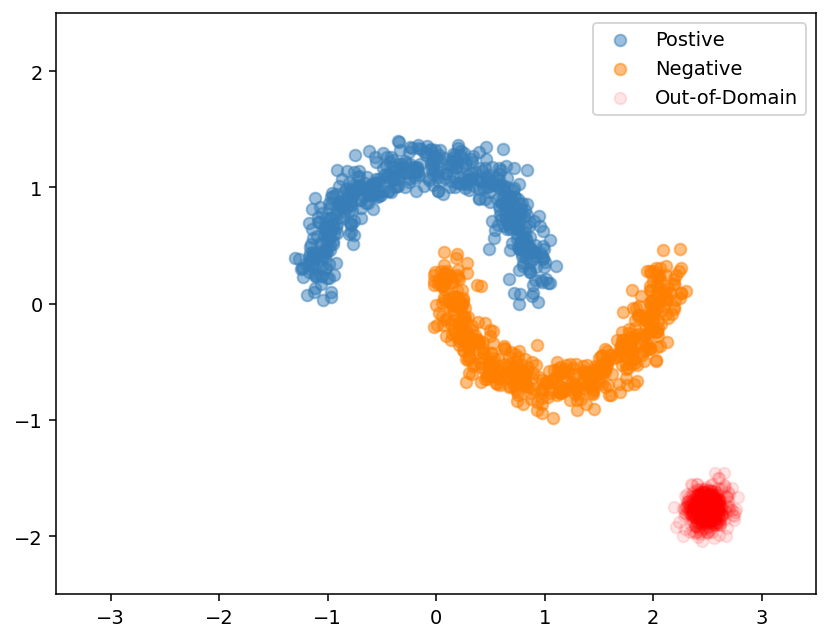

In [218]:
# Load the train, test and OOD datasets.
train_examples, train_labels = make_training_data(
    sample_size=500)
test_examples = make_testing_data()
ood_examples = make_ood_data(sample_size=500)

# Visualize
pos_examples = train_examples[train_labels == 0]
neg_examples = train_examples[train_labels == 1]

plt.figure(figsize=(7, 5.5))

plt.scatter(pos_examples[:, 0], pos_examples[:, 1], c="#377eb8", alpha=0.5)
plt.scatter(neg_examples[:, 0], neg_examples[:, 1], c="#ff7f00", alpha=0.5)
plt.scatter(ood_examples[:, 0], ood_examples[:, 1], c="red", alpha=0.1)

plt.legend(["Postive", "Negative", "Out-of-Domain"])

plt.ylim(DEFAULT_Y_RANGE)
plt.xlim(DEFAULT_X_RANGE)

plt.show()

Here the blue and orange represent the positive and negative classes, and the red represents the OOD data. A model that quantifies the uncertainty well is expected to be confident when close to training data  (i.e., $p(x_{test})$ close to 0 or 1), and be uncertain when far away from the training data regions  (i.e., $p(x_{test})$ close to 0.5).

## The deterministic model

### Define model

Start from the (baseline) deterministic model: a multi-layer residual network (ResNet) with dropout regularization.

In [219]:
#@title
class DeepResNet(tf.keras.Model):
  """Defines a multi-layer residual network."""
  def __init__(self, num_classes, num_layers=3, num_hidden=128,
               dropout_rate=0.1, **classifier_kwargs):
    super().__init__()
    # Defines class meta data.
    self.num_hidden = num_hidden
    self.num_layers = num_layers
    self.dropout_rate = dropout_rate
    self.classifier_kwargs = classifier_kwargs

    # Defines the hidden layers.
    self.input_layer = tf.keras.layers.Dense(self.num_hidden, trainable=False)
    self.dense_layers = [self.make_dense_layer() for _ in range(num_layers)]

    # Defines the output layer.
    self.classifier = self.make_output_layer(num_classes)

  def call(self, inputs):
    # Projects the 2d input data to high dimension.
    hidden = self.input_layer(inputs)

    # Computes the resnet hidden representations.
    for i in range(self.num_layers):
      resid = self.dense_layers[i](hidden)
      resid = tf.keras.layers.Dropout(self.dropout_rate)(resid)
      hidden += resid

    return self.classifier(hidden)

  def make_dense_layer(self):
    """Uses the Dense layer as the hidden layer."""
    return tf.keras.layers.Dense(self.num_hidden, activation="relu")

  def make_output_layer(self, num_classes):
    """Uses the Dense layer as the output layer."""
    return tf.keras.layers.Dense(
        num_classes, **self.classifier_kwargs)

This tutorial uses a 6-layer ResNet with 128 hidden units.

In [220]:
resnet_config = dict(num_classes=2, num_layers=6, num_hidden=128)

In [221]:
resnet_model = DeepResNet(**resnet_config)

In [222]:
resnet_model.build((None, 2))
resnet_model.summary()

Model: "deep_res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           multiple                  384       
                                                                 
 dense_102 (Dense)           multiple                  16512     
                                                                 
 dense_103 (Dense)           multiple                  16512     
                                                                 
 dense_104 (Dense)           multiple                  16512     
                                                                 
 dense_105 (Dense)           multiple                  16512     
                                                                 
 dense_106 (Dense)           multiple                  16512     
                                                                 
 dense_107 (Dense)           multiple                 

### Train model

Configure the training parameters to use `SparseCategoricalCrossentropy` as the loss function and the Adam optimizer.

In [223]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = tf.keras.metrics.SparseCategoricalAccuracy(),
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

train_config = dict(loss=loss, metrics=metrics, optimizer=optimizer)

Train the model for 100 epochs with batch size 128.

In [224]:
fit_config = dict(batch_size=128, epochs=100)

In [225]:
resnet_model.compile(**train_config)
resnet_model.fit(train_examples, train_labels, **fit_config)

Epoch 1/100
8/8 [==============================] - 1s 6ms/step - loss: 2.4276 - sparse_categorical_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 1.4459 - sparse_categorical_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7463 - sparse_categorical_accuracy: 0.5350
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3610 - sparse_categorical_accuracy: 0.8500
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2305 - sparse_categorical_accuracy: 0.9260
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1741 - sparse_categorical_accuracy: 0.9380
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1503 - sparse_categorical_accuracy: 0.9350
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1384 - sparse_categorical_accuracy: 0.9380
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 0

### Visualize uncertainty

In [226]:
#@title
def plot_uncertainty_surface(test_uncertainty, ax, cmap=None):
  """Visualizes the 2D uncertainty surface.
  
  For simplicity, assume these objects already exist in the memory:

    test_examples: Array of test examples, shape (num_test, 2).
    train_labels: Array of train labels, shape (num_train, ).
    train_examples: Array of train examples, shape (num_train, 2).
  
  Arguments:
    test_uncertainty: Array of uncertainty scores, shape (num_test,).
    ax: A matplotlib Axes object that specifies a matplotlib figure.
    cmap: A matplotlib colormap object specifying the palette of the 
      predictive surface.

  Returns:
    pcm: A matplotlib PathCollection object that contains the palette 
      information of the uncertainty plot.
  """
  # Normalize uncertainty for better visualization.
  test_uncertainty = test_uncertainty / np.max(test_uncertainty)

  # Set view limits.
  ax.set_ylim(DEFAULT_Y_RANGE)
  ax.set_xlim(DEFAULT_X_RANGE)

  # Plot normalized uncertainty surface.
  pcm = ax.imshow(
      np.reshape(test_uncertainty, [DEFAULT_N_GRID, DEFAULT_N_GRID]), 
      cmap=cmap,
      origin="lower",
      extent=DEFAULT_X_RANGE + DEFAULT_Y_RANGE,
      vmin=DEFAULT_NORM.vmin,
      vmax=DEFAULT_NORM.vmax,
      interpolation='bicubic', 
      aspect='auto')

  # Plot training data.
  ax.scatter(train_examples[:, 0], train_examples[:, 1],
             c=train_labels, cmap=DEFAULT_CMAP, alpha=0.5)
  ax.scatter(ood_examples[:, 0], ood_examples[:, 1], c="red", alpha=0.1)

  return pcm

Now visualize the predictions of the deterministic model. First plot the class probability: 
$$p(x) = softmax(logit(x))$$

In [227]:
resnet_logits = resnet_model(test_examples)
resnet_probs = tf.nn.softmax(resnet_logits, axis=-1)[:, 0]  # Take the probability for class 0.

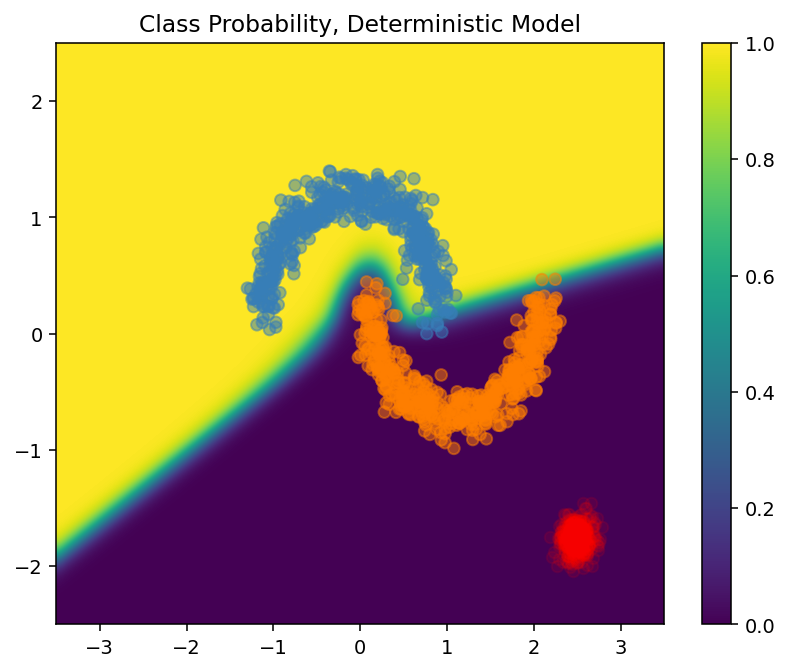

In [228]:
_, ax = plt.subplots(figsize=(7, 5.5))

pcm = plot_uncertainty_surface(resnet_probs, ax=ax)

plt.colorbar(pcm, ax=ax)
plt.title("Class Probability, Deterministic Model")

plt.show()

In this plot, the yellow and purple are the predictive probabilities for the two classes. The deterministic model did a good job in classifying the two known classes (blue and orange) with a nonlinear decision boundary. However, it is not **distance-aware**, and classified the never-seen red out-of-domain (OOD) examples confidently as the orange class.

Visualize the model uncertainty by computing the [predictive variance](https://en.wikipedia.org/wiki/Bernoulli_distribution#Variance):
$$var(x) = p(x) * (1 - p(x))$$

In [229]:
resnet_uncertainty = resnet_probs * (1 - resnet_probs)

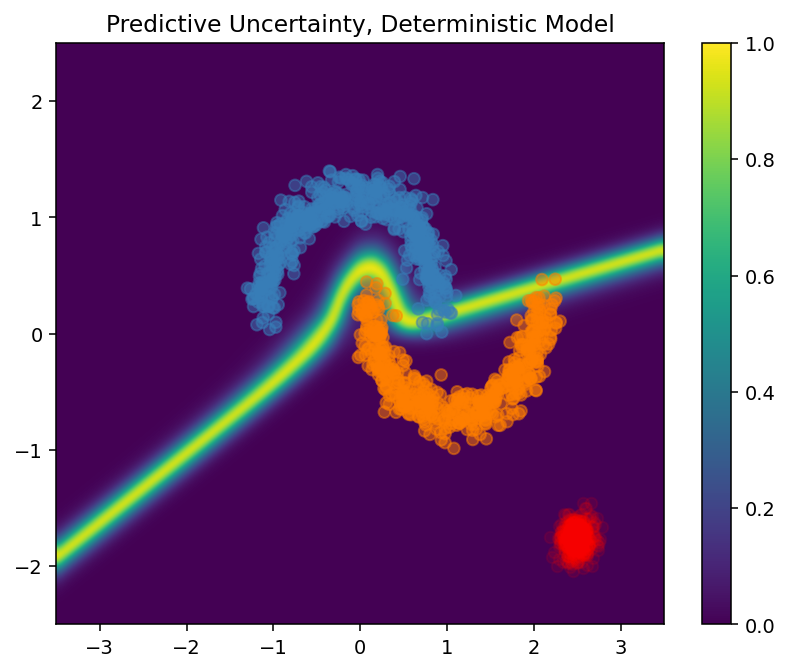

In [230]:
_, ax = plt.subplots(figsize=(7, 5.5))

pcm = plot_uncertainty_surface(resnet_uncertainty, ax=ax)

plt.colorbar(pcm, ax=ax)
plt.title("Predictive Uncertainty, Deterministic Model")

plt.show()

In this plot, the yellow indicates high uncertainty, and the purple indicates low uncertainty. A deterministic ResNet's uncertainty depends only on the test examples' distance from the decision boundary. This leads the model to be over-confident when out of the training domain. The next section shows how SNGP behaves differently on this dataset.

## The SNGP model

### Define SNGP model

Let's now implement the SNGP model. Both the SNGP components, `SpectralNormalization` and `RandomFeatureGaussianProcess`, are available at the tensorflow_model's [built-in  layers](https://github.com/tensorflow/models/tree/master/official/nlp/modeling/layers). 

>![SNGP](http://tensorflow.org/tutorials/understanding/images/sngp.png)


Let's look at these two components in more detail. (You can also jump to the [The SNGP model](#full-sngp-model) section to see how the full model is implemented.)

#### Spectral Normalization wrapper

[`SpectralNormalization`](https://github.com/tensorflow/models/blob/master/official/nlp/modeling/layers/spectral_normalization.py) is a Keras layer wrapper. It can be applied to an existing Dense layer like this:

In [231]:
dense = tf.keras.layers.Dense(units=10)
dense = nlp_layers.SpectralNormalization(dense, norm_multiplier=0.9)

Spectral normalization regularizes the hidden weight $W$ by gradually guiding its spectral norm (i.e., the largest eigenvalue of $W$) toward the target value  `norm_multiplier`. 


Note: Usually it is preferable to set `norm_multiplier` to a value smaller than 1. However in practice, it can be also relaxed to a larger value to ensure the deep network has enough expressive power.

#### The Gaussian Process (GP) layer

[`RandomFeatureGaussianProcess`](https://github.com/tensorflow/models/blob/master/official/nlp/modeling/layers/gaussian_process.py) implements a [random-feature based approximation](https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf) to a Gaussian process model that is end-to-end trainable with a deep neural network. Under the hood, the Gaussian process layer implements a two-layer network:

$$logits(x) = \Phi(x) \beta, \quad \Phi(x)=\sqrt{\frac{2}{M}} * cos(Wx + b)$$

Here $x$ is the input, and $W$ and $b$ are frozen weights initialized randomly from Gaussian and uniform distributions, respectively. (Therefore $\Phi(x)$ are called "random features".) $\beta$ is the learnable kernel weight similar to that of a Dense layer. 

In [232]:
batch_size = 32
input_dim = 1024
num_classes = 10

In [233]:
gp_layer = nlp_layers.RandomFeatureGaussianProcess(units=num_classes,
                                               num_inducing=1024,
                                               normalize_input=False,
                                               scale_random_features=True,
                                               gp_cov_momentum=-1)

The main parameters of the GP layers are:

* `units`: The dimension of the output logits.
* `num_inducing`: The dimension $M$ of the hidden weight $W$. Default to 1024.
* `normalize_input`: Whether to apply layer normalization to the input $x$.
* `scale_random_features`: Whether to apply the scale $\sqrt{2/M}$ to the hidden output.


Note: For a deep neural network that is sensitive to the learning rate (e.g., ResNet-50 and ResNet-110), it is generally recommended to set `normalize_input=True` to stablize training, and set `scale_random_features=False` to avoid the learning rate from being modified in unexpected ways when passing through the GP layer.

* `gp_cov_momentum` controls how the model covariance is computed. If set to a positive value (e.g., 0.999), the covariance matrix is computed using the momentum-based moving average update (similar to batch normalization). If set to -1, the the covariance matrix is updated without momentum.

Note: The momentum-based update method can be sensitive to batch size. Therefore it is generally recommended to set  `gp_cov_momentum=-1` to compute the covariance exactly. For this to work properly, the covariance matrix estimator needs to be reset at the begining of a new epoch in order to avoid counting the same data twice. For `RandomFeatureGaussianProcess`, this is can be done by calling its `reset_covariance_matrix()`. The next section shows an easy implementation of this using Keras' built-in API.


Given a batch input with shape `(batch_size, input_dim)`, the GP layer returns a `logits` tensor (shape `(batch_size, num_classes)`) for prediction, and also  `covmat` tensor (shape `(batch_size, batch_size)`) which is the posterior covariance matrix of the batch logits.

In [234]:
embedding = tf.random.normal(shape=(batch_size, input_dim))

logits, covmat = gp_layer(embedding)

Note: Notice that under this implementation of the SNGP model, the predictive logits $logit(x_{test})$ for all classes share the same covariance matrix $var(x_{test})$, which describes the distance between $x_{test}$ from the training data. 

Theoretically, it is possible to extend the algorithm to compute different variance values for different classes (as introduced in the [original SNGP paper](https://arxiv.org/abs/2006.10108)). However, this is difficult to scale to problems with large output spaces (e.g., ImageNet or language modeling).

<a name="full-sngp-model"></a>
#### The full SNGP model

Given the base class `DeepResNet`, the SNGP model can be implemented easily by  modifying the residual network's hidden and output layers. For compatibility with Keras `model.fit()` API, also modify the model's `call()` method so it only outputs `logits` during training.

In [235]:
class DeepResNetSNGP(DeepResNet):
  def __init__(self, spec_norm_bound=0.9, **kwargs):
    self.spec_norm_bound = spec_norm_bound
    super().__init__(**kwargs)

  def make_dense_layer(self):
    """Applies spectral normalization to the hidden layer."""
    dense_layer = super().make_dense_layer()
    return nlp_layers.SpectralNormalization(
        dense_layer, norm_multiplier=self.spec_norm_bound)

  def make_output_layer(self, num_classes):
    """Uses Gaussian process as the output layer."""
    return nlp_layers.RandomFeatureGaussianProcess(
        num_classes, 
        gp_cov_momentum=-1,
        **self.classifier_kwargs)

  def call(self, inputs, training=False, return_covmat=False):
    # Gets logits and covariance matrix from GP layer.
    logits, covmat = super().call(inputs)

    # Returns only logits during training.
    if not training and return_covmat:
      return logits, covmat

    return logits

Use the same architecture as the deterministic model.

In [236]:
resnet_config

{'num_classes': 2, 'num_hidden': 128, 'num_layers': 6}

In [237]:
sngp_model = DeepResNetSNGP(**resnet_config)

In [238]:
sngp_model.build((None, 2))
sngp_model.summary()

Model: "deep_res_net_sngp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           multiple                  384       
                                                                 
 spectral_normalization_1 (S  multiple                 16768     
 pectralNormalization)                                           
                                                                 
 spectral_normalization_2 (S  multiple                 16768     
 pectralNormalization)                                           
                                                                 
 spectral_normalization_3 (S  multiple                 16768     
 pectralNormalization)                                           
                                                                 
 spectral_normalization_4 (S  multiple                 16768     
 pectralNormalization)                           

<a name="covariance-reset-callback"></a>
Implement a Keras callback to reset the covariance matrix at the beginning of a new epoch.

In [239]:
class ResetCovarianceCallback(tf.keras.callbacks.Callback):

  def on_epoch_begin(self, epoch, logs=None):
    """Resets covariance matrix at the begining of the epoch."""
    if epoch > 0:
      self.model.classifier.reset_covariance_matrix()

Add this callback to the `DeepResNetSNGP` model class.

In [240]:
class DeepResNetSNGPWithCovReset(DeepResNetSNGP):
  def fit(self, *args, **kwargs):
    """Adds ResetCovarianceCallback to model callbacks."""
    kwargs["callbacks"] = list(kwargs.get("callbacks", []))
    kwargs["callbacks"].append(ResetCovarianceCallback())

    return super().fit(*args, **kwargs)

### Train model

Use `tf.keras.model.fit` to train the model.

In [241]:
sngp_model = DeepResNetSNGPWithCovReset(**resnet_config)
sngp_model.compile(**train_config)
sngp_model.fit(train_examples, train_labels, **fit_config)

Epoch 1/100
8/8 [==============================] - 6s 11ms/step - loss: 0.6346 - sparse_categorical_accuracy: 0.9165
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.5386 - sparse_categorical_accuracy: 0.9970
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4839 - sparse_categorical_accuracy: 0.9980
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4447 - sparse_categorical_accuracy: 0.9970
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.4131 - sparse_categorical_accuracy: 0.9970
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3874 - sparse_categorical_accuracy: 0.9960
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3640 - sparse_categorical_accuracy: 0.9970
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3451 - sparse_categorical_accuracy: 0.9970
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - 

### Visualize uncertainty

First compute the predictive logits and  variances.

In [242]:
sngp_logits, sngp_covmat = sngp_model(test_examples, return_covmat=True)

In [243]:
sngp_variance = tf.linalg.diag_part(sngp_covmat)[:, None]

<a name="mean-field-logits"></a>
Now compute the posterior predictive probability. The classic method for computing the predictive probability of a probabilistic model is to use Monte Carlo sampling, i.e.,

$$E(p(x)) = \frac{1}{M} \sum_{m=1}^M logit_m(x), $$

where $M$ is the sample size, and $logit_m(x)$ are random samples from the SNGP posterior $MultivariateNormal$(`sngp_logits`,`sngp_covmat`). However, this approach can be slow for latency-sensitive applications such as autonomous driving or real-time bidding. Instead, can approximate $E(p(x))$ using the [mean-field method](https://arxiv.org/abs/2006.07584):

$$E(p(x)) \approx softmax(\frac{logit(x)}{\sqrt{1+ \lambda * \sigma^2(x)}})$$

where $\sigma^2(x)$ is the SNGP variance, and $\lambda$ is often chosen as $\pi/8$ or $3/\pi^2$.

In [244]:
sngp_logits_adjusted = sngp_logits / tf.sqrt(1. + (np.pi / 8.) * sngp_variance)
sngp_probs = tf.nn.softmax(sngp_logits_adjusted, axis=-1)[:, 0]

Note: Instead of fixing $\lambda$ to a fixed value, you can also treat it as a hyperparameter, and tune it to optimize the model's calibration performance. This is known as [temperature scaling](http://proceedings.mlr.press/v70/guo17a.html) in the deep learning uncertainty literature. 

This mean-field method is implemented as a built-in function `layers.gaussian_process.mean_field_logits`:

In [245]:
def compute_posterior_mean_probability(logits, covmat, lambda_param=np.pi / 8.):
  # Computes uncertainty-adjusted logits using the built-in method.
  logits_adjusted = nlp_layers.gaussian_process.mean_field_logits(
      logits, covmat, mean_field_factor=lambda_param)
  
  return tf.nn.softmax(logits_adjusted, axis=-1)[:, 0]

In [246]:
sngp_logits, sngp_covmat = sngp_model(test_examples, return_covmat=True)
sngp_probs = compute_posterior_mean_probability(sngp_logits, sngp_covmat)

### SNGP Summary

In [247]:
#@title

def plot_predictions(pred_probs, model_name=""):
  """Plot normalized class probabilities and predictive uncertainties."""
  # Compute predictive uncertainty.
  uncertainty = pred_probs * (1. - pred_probs)

  # Initialize the plot axes.
  fig, axs = plt.subplots(1, 2, figsize=(14, 5))

  # Plots the class probability.
  pcm_0 = plot_uncertainty_surface(pred_probs, ax=axs[0])
  # Plots the predictive uncertainty.
  pcm_1 = plot_uncertainty_surface(uncertainty, ax=axs[1])

  # Adds color bars and titles.
  fig.colorbar(pcm_0, ax=axs[0])
  fig.colorbar(pcm_1, ax=axs[1])

  axs[0].set_title(f"Class Probability, {model_name}")
  axs[1].set_title(f"(Normalized) Predictive Uncertainty, {model_name}")

  plt.show()  

Put everything together. The entire procedure (training, evaluation and uncertainty computation) can be done in just five lines:

In [248]:
def train_and_test_sngp(train_examples, test_examples):
  sngp_model = DeepResNetSNGPWithCovReset(**resnet_config)

  sngp_model.compile(**train_config)
  sngp_model.fit(train_examples, train_labels, verbose=0, **fit_config)

  sngp_logits, sngp_covmat = sngp_model(test_examples, return_covmat=True)
  sngp_probs = compute_posterior_mean_probability(sngp_logits, sngp_covmat)

  return sngp_probs

In [249]:
sngp_probs = train_and_test_sngp(train_examples, test_examples)

Visualize the class probability (left) and the predictive uncertainty (right) of the SNGP model.

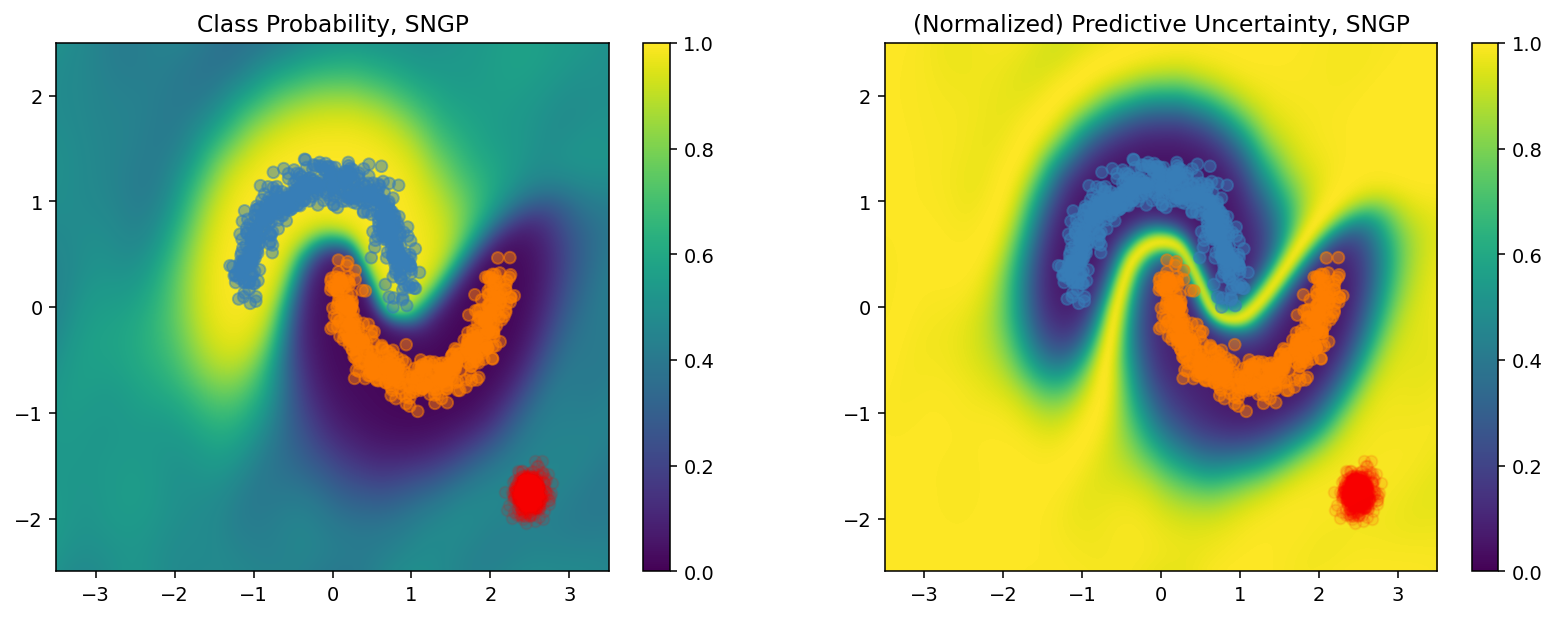

In [250]:
plot_predictions(sngp_probs, model_name="SNGP")

Remember that in the class probability plot (left), the yellow and purple are class probabilities. When close to the training data domain, SNGP correctly classifies the examples with high confidence (i.e., assigning near 0 or 1 probability). When far away from the training data, SNGP gradually becomes less confident, and its predictive probability becomes close to 0.5 while the (normalized) model uncertainty rises to 1.

Compare this to the uncertainty surface of the deterministic model: 

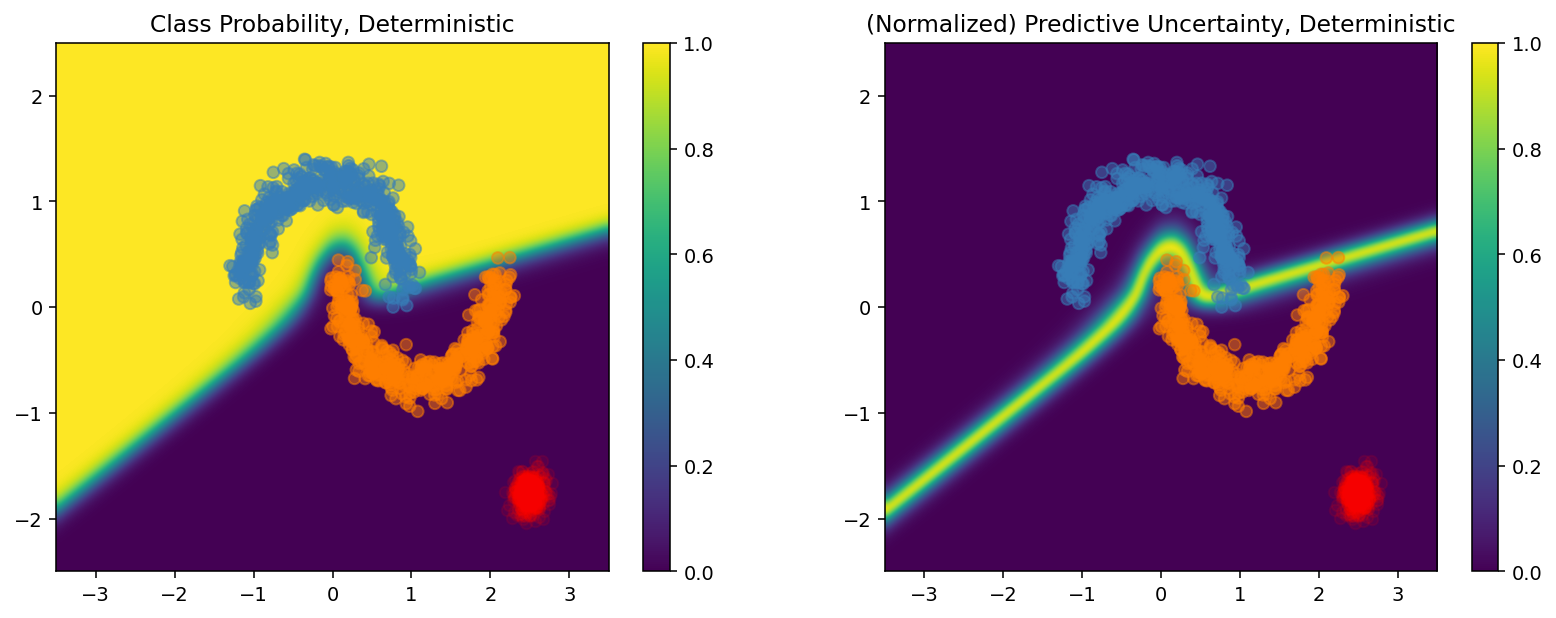

In [251]:
plot_predictions(resnet_probs, model_name="Deterministic")

Like mentioned earlier, a deterministic model is not _distance-aware_. Its uncertainty is defined by the distance of the test example from the decision boundary. This leads the model to produce overconfident predictions for the out-of-domain examples (red).

## Comparison with other uncertainty approaches

This section compares the uncertainty of SNGP with [Monte Carlo dropout](https://arxiv.org/abs/1506.02142) and [Deep ensemble](https://arxiv.org/abs/1612.01474).

Both of these methods are based on Monte Carlo averaging of multiple forward passes of deterministic models. First set the ensemble size $M$.

In [252]:
num_ensemble = 10

### Monte Carlo dropout

Given a trained neural network with Dropout layers, [Monte Carlo dropout](https://arxiv.org/abs/1506.02142) computes the mean predictive probability 

$$E(p(x)) = \frac{1}{M}\sum_{m=1}^M softmax(logit_m(x))$$ 

by averaging over multiple Dropout-enabled forward passes $\{logit_m(x)\}_{m=1}^M$.

In [253]:
def mc_dropout_sampling(test_examples):
  # Enable dropout during inference.
  return resnet_model(test_examples, training=True)

In [254]:
# Monte Carlo dropout inference.
dropout_logit_samples = [mc_dropout_sampling(test_examples) for _ in range(num_ensemble)]
dropout_prob_samples = [tf.nn.softmax(dropout_logits, axis=-1)[:, 0] for dropout_logits in dropout_logit_samples]
dropout_probs = tf.reduce_mean(dropout_prob_samples, axis=0)

In [255]:
dropout_probs = tf.reduce_mean(dropout_prob_samples, axis=0)

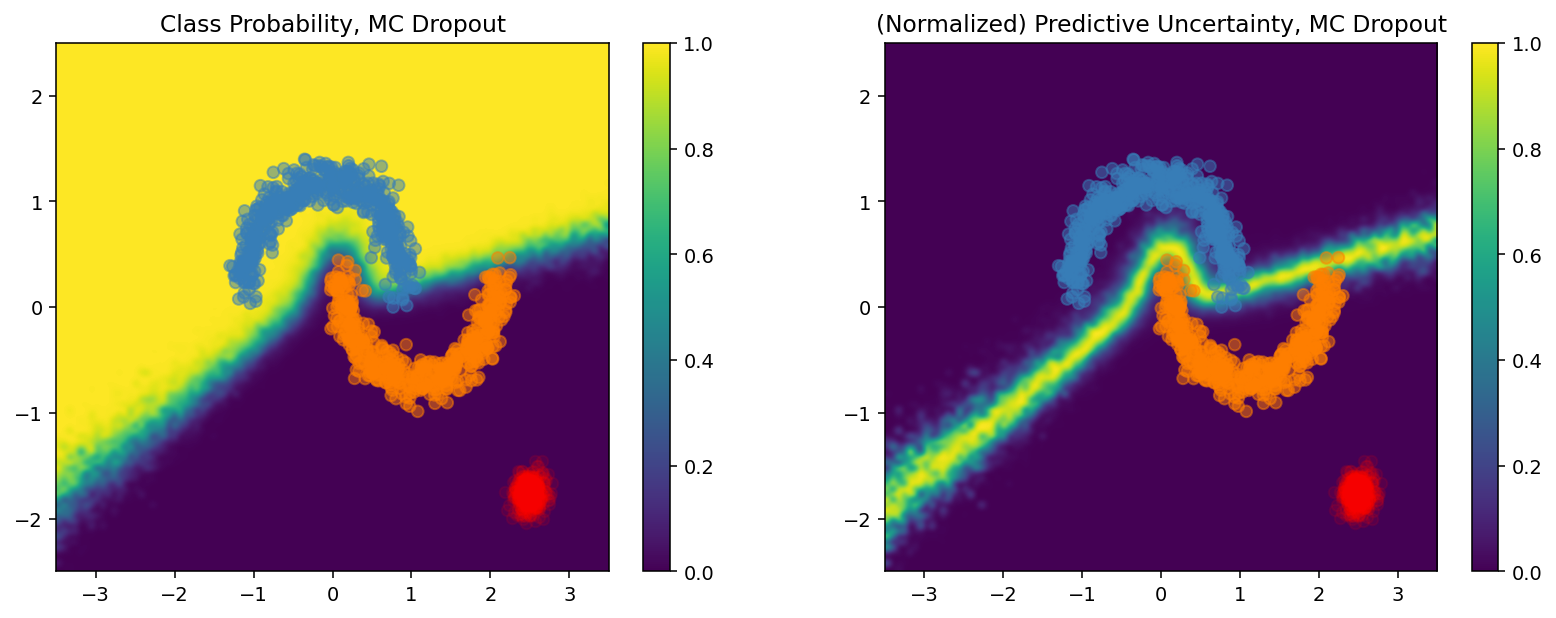

In [256]:
plot_predictions(dropout_probs, model_name="MC Dropout")

### Deep ensemble

[Deep ensemble](https://arxiv.org/abs/1612.01474) is a state-of-the-art (but expensive) method for deep learning uncertainty. To train a Deep ensemble, first train $M$ ensemble members.

In [257]:
# Deep ensemble training
resnet_ensemble = []
for _ in range(num_ensemble):
  resnet_model = DeepResNet(**resnet_config)
  resnet_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  resnet_model.fit(train_examples, train_labels, verbose=0, **fit_config)  

  resnet_ensemble.append(resnet_model)

Collect logits and compute the mean predctive probability $E(p(x)) = \frac{1}{M}\sum_{m=1}^M softmax(logit_m(x))$.

In [258]:
# Deep ensemble inference
ensemble_logit_samples = [model(test_examples) for model in resnet_ensemble]
ensemble_prob_samples = [tf.nn.softmax(logits, axis=-1)[:, 0] for logits in ensemble_logit_samples]
ensemble_probs = tf.reduce_mean(ensemble_prob_samples, axis=0)

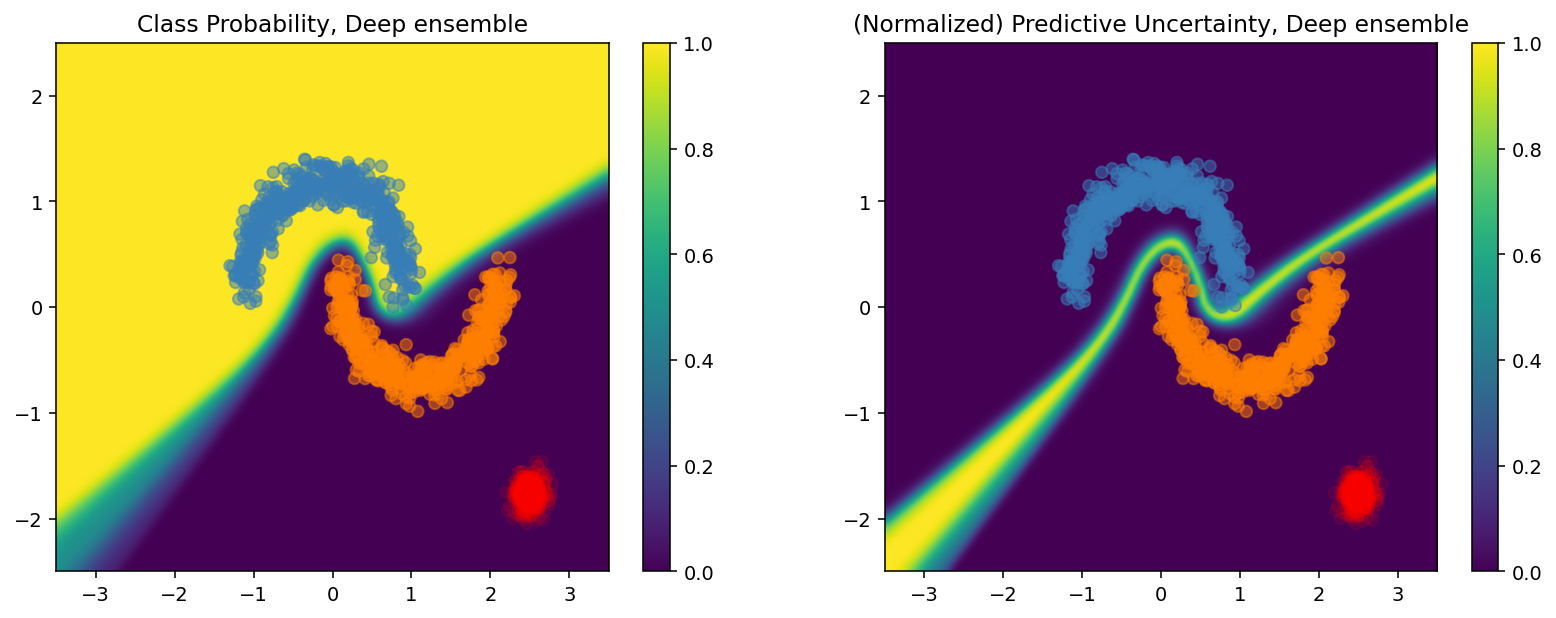

In [259]:
plot_predictions(ensemble_probs, model_name="Deep ensemble")

Both MC Dropout and Deep ensemble improve a model's uncertainty ability by making the decision boundary less certain. However, they both inherit the deterministic deep network's limitation in lacking distance awareness.

## Summary

In this tutorial, you have:
* Implemented a SNGP model on a deep classifier to improve its distance awareness.
* Trained the SNGP model end-to-end using Keras `model.fit()` API.
* Visualized the uncertainty behavior of SNGP.
* Compared the uncertainty behavior between SNGP, Monte Carlo dropout and deep ensemble models.

## Resources and further reading

* See the [SNGP-BERT tutorial](https://www.tensorflow.org/text/tutorials/uncertainty_quantification_with_sngp_bert) for an example of applying SNGP on a BERT model for uncertainty-aware natural language understanding.
* See [Uncertainty Baselines](https://github.com/google/uncertainty-baselines)  for the implementation of SNGP model (and many other uncertainty methods) on a wide variety of benchmark datasets (e.g., [CIFAR](https://www.tensorflow.org/datasets/catalog/cifar100), [ImageNet](https://www.tensorflow.org/datasets/catalog/imagenet2012), [Jigsaw toxicity detection](https://www.tensorflow.org/datasets/catalog/wikipedia_toxicity_subtypes), etc).
* For a deeper understanding of the SNGP method, check out the paper [Simple and Principled Uncertainty Estimation with Deterministic Deep Learning via Distance Awareness](https://arxiv.org/abs/2006.10108).


# I. Bandit algorithm for sampling multiple recommenders

For conveniency slides used for presentation are available on https://www.dropbox.com/s/6px7a37qddstgtn/RLSS.pdf?dl=0

The objective of this notebook is to apply the bandits algorithms to recommendation problem using a simulated envrionment. Although in practice you would also use the real data, the complexity of the recommendation problem and the associated algorithmic challenges can already be revealed even in this simple setting.

![RecSys](https://github.com/yfletberliac/rlss2019-hands-on/blob/master/imgs/recsys_scheme.png?raw=1)

## Controlled recommendation environment

In the simulated environment, user browsers a web-site and might click on recommendation served by a recommendation agent. The goal of the agent is to maximize the number of clicks. The simulation is going to be a little bit more involved that ideal situation from the previous TP. In particular we are going to work on a stream of user which are also generating some "organic" observations, meaning that you collect some browsing events and have to perform some recommendations until the user decides to leave.

### Define action, observation, reward

* Action -- a recommended item (e.g., in e-commerce it can be a product). Here the simulator will be set to have 100 possible products
* Reward -- user interaction with the recommendation (e.g., a click)
* Observation -- user activity (e.g., list of products that user has visited during his/her browsing session). Here we report only "organic" event which are not the recommended item and can occur even if the recommendation was not used.

In [260]:
# If you are running this notebook on Colab, setup with the following:
!git clone https://github.com/yfletberliac/rlss2019-hands-on.git > /dev/null 2>&1
import sys
sys.path.insert(0, './rlss2019-hands-on/utils/rec_systems')
# If using the notebook locally, replace by:
# sys.path.insert(0, '../utils/rec_systems')

In [261]:
from reco_env import RecoEnv, env_1_args
from configuration import Configuration
from agent import Agent, RandomAgent, random_args

# you can overwrite environment arguments here
RND_SEED = 1234
env_1_args['random_seed'] = RND_SEED

# create environment with configuration
env = RecoEnv(Configuration({
            **env_1_args,
}))
env.reset()

# random agent
rand_agent = RandomAgent(Configuration({
    **random_args,    
}))

# counting steps
i = 0

observation, _, _, _ = env.step(None)
reward, done = 0, False
while not done:
    # choose action given current observation
    action = rand_agent.act(observation)            
    # execute action in the environment
    observation, reward, done, info = env.step(action['a'])
    print(f"Step: {i} - Action: {action} - Observation: {observation} - Reward: {reward}")
    i += 1

Step: 0 - Action: {'a': 66, 'ps': 0.01} - Observation: [] - Reward: 0
Step: 1 - Action: {'a': 92, 'ps': 0.01} - Observation: [] - Reward: 0
Step: 2 - Action: {'a': 98, 'ps': 0.01} - Observation: [] - Reward: 0
Step: 3 - Action: {'a': 17, 'ps': 0.01} - Observation: [] - Reward: 0
Step: 4 - Action: {'a': 83, 'ps': 0.01} - Observation: [72, 27, 27, 12] - Reward: 0
Step: 5 - Action: {'a': 57, 'ps': 0.01} - Observation: [] - Reward: 0
Step: 6 - Action: {'a': 86, 'ps': 0.01} - Observation: [] - Reward: 0
Step: 7 - Action: {'a': 97, 'ps': 0.01} - Observation: [] - Reward: 0


### Simulation of user response to recommendation

User response to recommendation is modeled as a function of (1) affinity of user to recommended product, and (2) correction due to the recommendation. 

$\mu(u,p,t) := f(\Lambda(u,p,t) + \epsilon(u,p,t))$,

where $f$ is an increasing function, $\Lambda(u,p,t)$ is the log odds of user $u$ being interested by product $a$ at time $t$, $\epsilon(u,p,t))$ is a zero mean correction.

Assuming the latent space for user and product, let $\omega \in \mathbb{R}^K$ be the latent representation of user $u$ of size $K$, $\beta \in \mathbb{R}^K$ is the latent reprentation of product $p$, then user response on recommendation can be modeled as

$\mu(u,p,t) := \text{sigmoid}(\beta^T \omega + \mu_\epsilon)$, 

where $\omega_i = \mathcal{N}(0, \sigma^2_\omega)$, $\beta_i = \mathcal{N}(0, 1)$, $\mu_\epsilon = \mathcal{N}(0, \sigma^2_\mu)$.

In advertisement, typical values for $\mu(u,p,t)$ are around $0.02$.

## Online learning using recommendation environment

We introduce functions that train, evaluate and plot the evaluation metrics of recommendation agents.

In [262]:
from train_eval_utils import train_eval_agents, plot_ctr

help(train_eval_agents)
help(plot_ctr)

Help on function train_eval_agents in module train_eval_utils:

train_eval_agents(agents, config, num_train_users, num_eval_users)
    Trains and evaluates a list of agents on a given number of users
    
    :param agents: list of agents to evaluate
    :param config: configuration of recommendation environment
    :param num_train_users: number of train users
    :param num_eval_users: number of evaluation users
    :return dataframe containing agent class, 50% quantile of CTR, 2.5% quantile of CTR, 97.5% quantile of CTR, execution time

Help on function plot_ctr in module train_eval_utils:

plot_ctr(eval_ctr)
    Plots agents average CTR and confidence interval
    
    :param eval_ctr: dataframe containing agent class, 50% quantile of CTR, 2.5% quantile of CTR, 97.5% quantile of CTR



## Bandits

Code bandits algorithms that you have already seen in the class. In this part the simulator is configured in a such way that we are actually facing the stochastic bandit setting: all the users are the same and their preferences are not evolving.

### UCB algorithm [Auer 2002]

Code the agent that runs the UCB algorithm for product click-through rate (number of clicks / number of displays).

* First, we provide the code for bound based on Hoeffding inequality

$I_k = argmax_k \hat{\mu}_{k,n} + \sqrt{\frac{2 \log t}{n}}$


* Then, improve by tuning $\alpha$ 

$I_k = argmax_k \hat{\mu}_{k,n} + \alpha \sqrt{\frac{2 \log t}{n}}$

* Finally, use the fact that click is a Bernoulli random variable to obtain a sharper bound

In [263]:
import numpy as np

# Implement an Agent interface
class AlphaUCBAgent(Agent):
    def __init__(self, config):
        super(AlphaUCBAgent, self).__init__(config)

        # Init with ones to avoid division by zero
        self.product_rewards = np.zeros(self.config.num_products, dtype=np.float32)
        self.product_counts = np.ones(self.config.num_products, dtype=np.float32)       
        # alpha parameter (already tuned)
        self.alpha = 0.01        
        
    def train(self, observation, action, reward, done):
        """Train from observed data"""

        if reward is not None and action is not None:
            self.product_rewards[action] += reward
            self.product_counts[action] += 1

    def act(self, observation):
        """Return an action given current observation"""
        
        t = sum(self.product_counts)
        ucb = self.product_rewards / t + self.alpha * np.sqrt(2.0*np.log(t)/self.product_counts)
        action = np.argmax(ucb)

        return { 'a': action }

In [265]:
# TODO: code the beta bound
def ucb_bound(num_clicks, num_displays):
    return 

class BetaUCBAgent(Agent):
    def __init__(self, config):
        super(BetaUCBAgent, self).__init__(config)

        self.product_rewards = np.zeros(self.config.num_products, dtype=np.float32)
        self.product_counts = np.ones(self.config.num_products, dtype=np.float32)
        
        self.ucb_func = np.vectorize(ucb_bound)
        
    def train(self, observation, action, reward, done):
        if reward is not None and action is not None:
            self.product_rewards[action] += reward
            self.product_counts[action] += 1

    def act(self, observation):
        ucb = self.ucb_func(self.product_rewards, self.product_counts)
        action = np.argmax(ucb)

        return { 'a': action }

### Compare UCB agents performance and running time in stochastic bandits setting

* Train and evaluate UCB with Hoeffding bound and exact bound

* Achieve similar performance by tuning $\alpha$ parameter

* Compare the running time

In [267]:
# number of products to recommend
num_products = 10
# number of users for train and evaluation
num_train_users, num_eval_users = 1000, 1000

custom_args = { 'num_products': num_products,
                'random_seed': RND_SEED,
              }
config = Configuration({ 
        **env_1_args,
        **custom_args,
})

alpha_ucb_agent = AlphaUCBAgent(config)
beta_ucb_agent = BetaUCBAgent(config)
rand_agent = RandomAgent(config)

agents = [rand_agent, alpha_ucb_agent, beta_ucb_agent]



### Exp3 / Boltzmann exploration algorithm

* Code the agent that runs the Exp3 / Boltzmann exploration algorithm. The adversarial setting is going to be described later in the course but you can find it [Tor Lattimore's bandits blog](https://banditalgs.com/2016/10/01/adversarial-bandits/): [43].
__Remark:__ *it is possible to have a exponential speedup of the sampling unsing storing the weights in a binary tree containing partial sums, see http://timvieira.github.io/blog/post/2016/11/21/heaps-for-incremental-computation/*

* Tune temperature parameter

In [270]:
from scipy.special import logsumexp
from numpy.random import choice

class Exp3Agent(Agent):
    def __init__(self, config):
        super(Exp3Agent, self).__init__(config)

        self.product_rewards = np.zeros(self.config.num_products, dtype=np.float32)    
        self.product_counts = np.ones(self.config.num_products, dtype=np.float32)
        # TODO: tune softmax temperature
        # self.eta = ..
        
    def train(self, observation, action, reward, done):
        if reward is not None and action is not None:
            self.product_rewards[action] += reward
            self.product_counts[action] += 1
            
    def log_softmax(self, vec):
        return vec - logsumexp(vec)

    def softmax(self, vec):
        probs = np.exp(self.log_softmax(vec))
        probs /= probs.sum()
        return probs
    
    def act(self, observation):
        # TODO: compute probability of choosing action using Boltzmann exploration
        # prob = ..
        # TODO: sample an action
        # action = ..

        return { 'a': action, 'ps': prob[action] }

### Compare UCB and Exp3 agents performance and running time in stochastic bandits setting

* Train and evaluate UCB and Exp3 algorithms against random product recommendation

* Increase the number of products to 100 and explain the change

In [272]:
# number of products to recommend
num_products = 10
# number of users for train and evaluation
num_train_users, num_eval_users = 1000, 1000

custom_args = { 'num_products': num_products,
                'random_seed': RND_SEED,
              }
config = Configuration({ 
        **env_1_args,
        **custom_args,
})

ucb_agent = AlphaUCBAgent(config)
exp3_agent = Exp3Agent(config)
rand_agent = RandomAgent(config)

agents = [rand_agent, ucb_agent, exp3_agent]

# stats = train_eval_agents(agents, config, num_train_users, num_eval_users)
# print(stats)

# plot_ctr(stats)

### Compare UCB and Exp3 agents in a non-stationary setting

Now we set the simulation to have some updates in the preference of the users thought they are initialized equally (using the random_seed given in the custom_args). This modelization of the user state change leads to non-stationary user response to a recommendation and is dependant of what you recommended.

In [274]:
num_products = 100
num_train_users, num_eval_users = 1000, 1000

# adversarial setting: increase user state change during time
custom_args = { 'num_products': num_products,
                'random_seed': RND_SEED,                
                'sigma_omega': 0.3
              }
config = Configuration({ 
        **env_1_args,
        **custom_args,
})

ucb_agent = AlphaUCBAgent(config)
exp3_agent = Exp3Agent(config)
rand_agent = RandomAgent(config)

agents = [rand_agent, ucb_agent, exp3_agent]

# stats = train_eval_agents(agents, config, num_train_users, num_eval_users)
# print(stats)

# plot_ctr(stats)

## Compare sample complexity

$\sigma$-subgaussian distribution
* UCB
$R_T = \mathcal{O}(\sum_{i>1} \frac{\log T}{\Delta_i})$
* Exp3
$R_T = \mathcal{O}(\sum_{i>1}\frac{\log^2 (T \Delta_i^2)}{\Delta_i})$

distribution-independent
* UCB
$R_T = \mathcal{O}(\sqrt{KT\log T})$
* Exp3
$R_T = \mathcal{O}(\sqrt{KT}\log K)$

## Using side data: browsing events

To make algorithms more sample efficient, we will use side data to bootstrap the recommendation. Specifically, we will use the user browsing events (aka "organic" events). The amount of browsing data is typically much larger than the number of click events on recommendation.

## Offline evaluation

Running counterfactual evaluations on real datasets use more time than a reasonnable practical sessions does. 
We are going to exhibit the core of the problems theses algorithms faces on a very toy example. 

Assume we are running a $\pi_0$ policy random uniform on the possible sets of arms of size 20 with a number of context 10. This means that at each timestep we have 200 possibles combinations to create the recommendation which is very small. Moreover we assume that the obtained reward is a constant equal to 1. This means we have no stochasticity due to realization of the sample and any policy $\pi$ should have the same estimator of averaged reward.

1. We assume the new $\pi$ is always choosing arm 1, plot the estimation of the IPS  with respect to the number of samples on one run. If you want to be close to the reality (and do more sophisticated experiments), it is better to simulate a dataset $S=\{context_t, action_t, propensity_t, reward_t\}$ and then write the IPS estimation rather than rely on mathematical properties of our minimalist system. Also remark than in real system this is a good idea to also store the possible set of actions at each timestep. What do you think of this estimator while you can sample $S$ only one time ? 

2. Supperpose the self normalized operator on the same plot for each time step. Keep in mind this is actually the best possible case for SNIPS and that for more complex scenarios many others problems can be more important than the variance fixed by snips. 

3. Now the reward of arm 2 is 1 with probability 1/2 and 1 with probability 1/3 for all other arms. The $\pi_0$ policy select arm one with probability 0.9 and an arm at random with proba 0.1. Build several estimates of the policy selecting always arm 2. How many samples do you need to identify with confidence that this policy is better than the logging policy ? 


## Resources

* RecoGym https://github.com/criteo-research/reco-gym
* Bandit Algorithms, 2018 by Tor Lattimore and Csaba Szepesvári

# J. tf-serving for serving and tfx for training 

**Warning: This notebook is designed to be run in a Google Colab only**.  It installs packages on the system and requires root access.  If you want to run it in a local Jupyter notebook, please proceed with caution.

Note: You can run this example right now in a Jupyter-style notebook, no setup required!  Just click "Run in Google Colab"

<div class="devsite-table-wrapper"><table class="tfo-notebook-buttons" align="left">
<tr><td><a target="_blank" href="https://www.tensorflow.org/tfx/tutorials/serving/rest_simple">
<img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a></td>
<td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/tfx/blob/master/docs/tutorials/serving/rest_simple.ipynb">
<img src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a></td>
<td><a target="_blank" href="https://github.com/tensorflow/tfx/blob/master/docs/tutorials/serving/rest_simple.ipynb">
<img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">View source on GitHub</a></td>
<td><a href="https://storage.googleapis.com/tensorflow_docs/tfx/docs/tutorials/serving/rest_simple.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a></td>
</tr></table></div>

This guide trains a neural network model to classify [images of clothing, like sneakers and shirts](https://github.com/zalandoresearch/fashion-mnist), saves the trained model, and then serves it with [TensorFlow Serving](https://www.tensorflow.org/tfx/guide/serving).  The focus is on TensorFlow Serving, rather than the modeling and training in TensorFlow, so for a complete example which focuses on the modeling and training see the [Basic Classification example](https://github.com/tensorflow/docs/blob/master/site/en/r1/tutorials/keras/basic_classification.ipynb).

This guide uses [tf.keras](https://github.com/tensorflow/docs/blob/master/site/en/r1/guide/keras.ipynb), a high-level API to build and train models in TensorFlow.

In [283]:
import sys

# Confirm that we're using Python 3
assert sys.version_info.major == 3, 'Oops, not running Python 3. Use Runtime > Change runtime type'

In [284]:
# TensorFlow and tf.keras
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
     |████████████████████████████████| 2.4 MB 5.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scann 1.2.6 requires tensorflow~=2.8.0, but you have tensorflow 2.9.0 which is incompatible.
TensorFlow version: 2.8.0


## Create your model

### Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. You can access the Fashion MNIST directly from TensorFlow, just import and load the data.

Note: Although these are really images, they are loaded as NumPy arrays and not binary image objects.

In [285]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# scale the values to 0.0 to 1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))

4431872/4422102 [==============================] - 0s 0us/step

train_images.shape: (60000, 28, 28, 1), of float64
test_images.shape: (10000, 28, 28, 1), of float64


### Train and evaluate your model

Let's use the simplest possible CNN, since we're not focused on the modeling part.

In [286]:
model = keras.Sequential([
  keras.layers.Conv2D(input_shape=(28,28,1), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, name='Dense')
])
model.summary()

testing = False
epochs = 5

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=epochs)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy: {}'.format(test_acc))

Model: "sequential_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 13, 13, 8)         80        
                                                                 
 flatten_1 (Flatten)         (None, 1352)              0         
                                                                 
 Dense (Dense)               (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5352 - sparse_categorical_accuracy: 0.8151
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3867 - sparse_categorical_accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - los

## Save your model

To load our trained model into TensorFlow Serving we first need to save it in [SavedModel](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/saved_model) format.  This will create a protobuf file in a well-defined directory hierarchy, and will include a version number.  [TensorFlow Serving](https://www.tensorflow.org/tfx/guide/serving) allows us to select which version of a model, or "servable" we want to use when we make inference requests.  Each version will be exported to a different sub-directory under the given path.

In [287]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1



INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



Saved model:
total 92
drwxr-xr-x 2 root root  4096 May 22 04:07 assets
-rw-r--r-- 1 root root  8248 May 22 04:07 keras_metadata.pb
-rw-r--r-- 1 root root 72792 May 22 04:07 saved_model.pb
drwxr-xr-x 2 root root  4096 May 22 04:07 variables


## Examine your saved model

We'll use the command line utility `saved_model_cli` to look at the [MetaGraphDefs](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/MetaGraphDef) (the models) and [SignatureDefs](../signature_defs) (the methods you can call) in our SavedModel.  See [this discussion of the SavedModel CLI](https://github.com/tensorflow/docs/blob/master/site/en/r1/guide/saved_model.md#cli-to-inspect-and-execute-savedmodel) in the TensorFlow Guide.

In [288]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['Conv1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_Conv1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['Dense'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          inputs: Ten

That tells us a lot about our model!  In this case we just trained our model, so we already know the inputs and outputs, but if we didn't this would be important information.  It doesn't tell us everything, like the fact that this is grayscale image data for example, but it's a great start.

## Serve your model with TensorFlow Serving

**Warning: If you are running this NOT on a Google Colab,** following cells
will install packages on the system with root access. If you want to run it in
a local Jupyter notebook, please proceed with caution.

### Add TensorFlow Serving distribution URI as a package source:

We're preparing to install TensorFlow Serving using [Aptitude](https://wiki.debian.org/Aptitude) since this Colab runs in a Debian environment.  We'll add the `tensorflow-model-server` package to the list of packages that Aptitude knows about.  Note that we're running as root.

Note: This example is running TensorFlow Serving natively, but [you can also run it in a Docker container](https://www.tensorflow.org/tfx/serving/docker), which is one of the easiest ways to get started using TensorFlow Serving.

In [289]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [290]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  49050      0 --:--:-- --:--:-- --:--:-- 49050
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://storage.googleapis.com/tensorflow

### Install TensorFlow Serving

This is all you need - one command line!

In [291]:
!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 47 not upgraded.
Need to get 340 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.8.0 [340 MB]
Fetched 340 MB in 4s (75.8 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.8.0_all.deb ...
Unpacking tensorflow-model-server (2.8.0) ...
Setting up tensorflow-model-server (2.8.0) ...


### Start running TensorFlow Serving

This is where we start running TensorFlow Serving and load our model.  After it loads we can start making inference requests using REST.  There are some important parameters:

* `rest_api_port`: The port that you'll use for REST requests.
* `model_name`: You'll use this in the URL of REST requests.  It can be anything.
* `model_base_path`: This is the path to the directory where you've saved your model.


In [292]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [293]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1


Starting job # 0 in a separate thread.


In [294]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


## Make a request to your model in TensorFlow Serving

First, let's take a look at a random example from our test data.

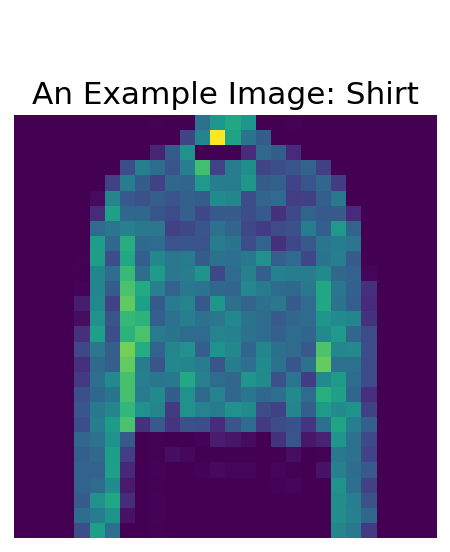

In [295]:
def show(idx, title):
  plt.figure()
  plt.imshow(test_images[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(test_images)-1)
show(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))

Ok, that looks interesting.  How hard is that for you to recognize? Now let's create the JSON object for a batch of  three inference requests, and see how well our model recognizes things:

In [296]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


### Make REST requests

#### Newest version of the servable

We'll send a predict request as a POST to our server's REST endpoint, and pass it three examples.  We'll ask our server to give us the latest version of our servable by not specifying a particular version.

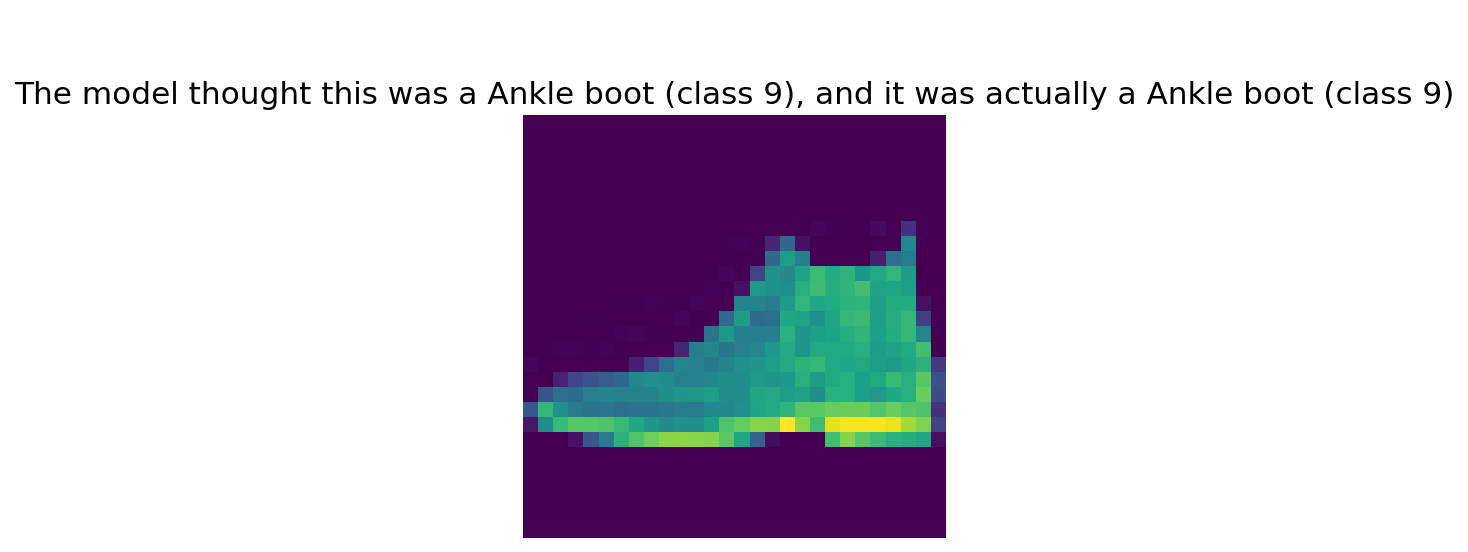

In [297]:
# docs_infra: no_execute
!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))

#### A particular version of the servable

Now let's specify a particular version of our servable.  Since we only have one, let's select version 1.  We'll also look at all three results.

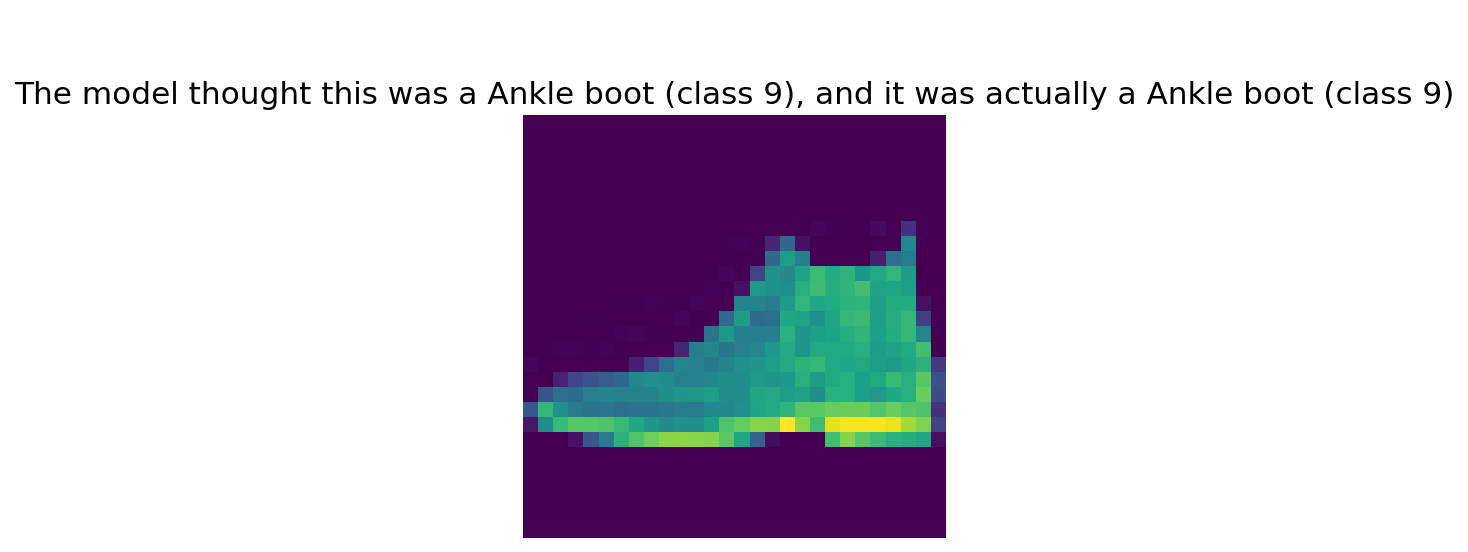

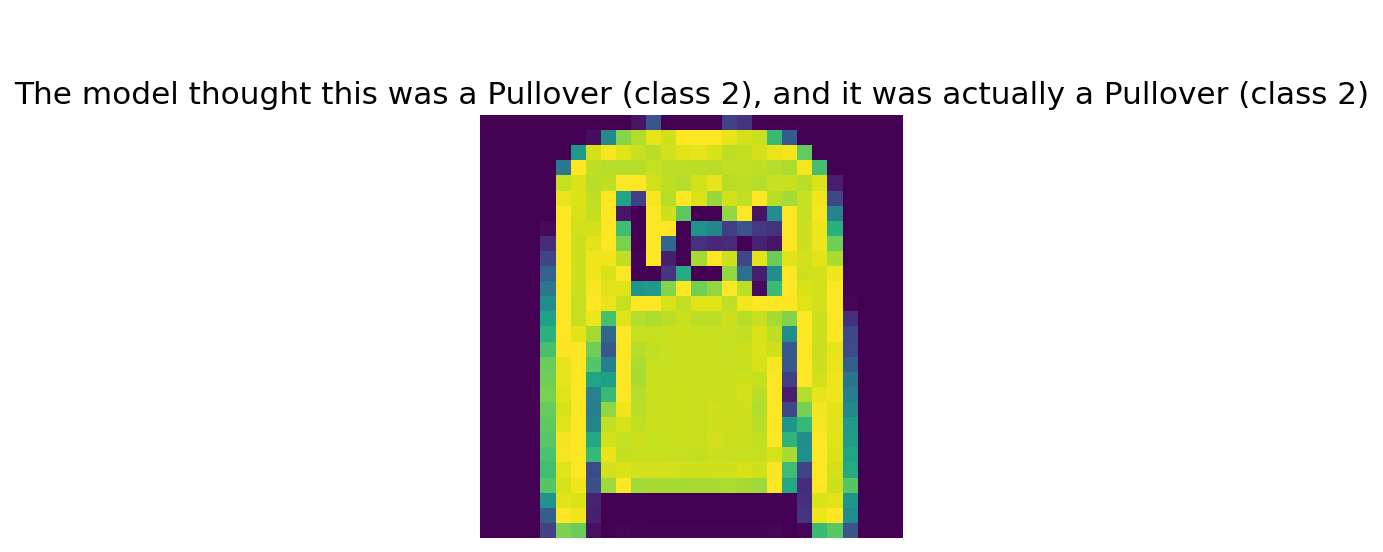

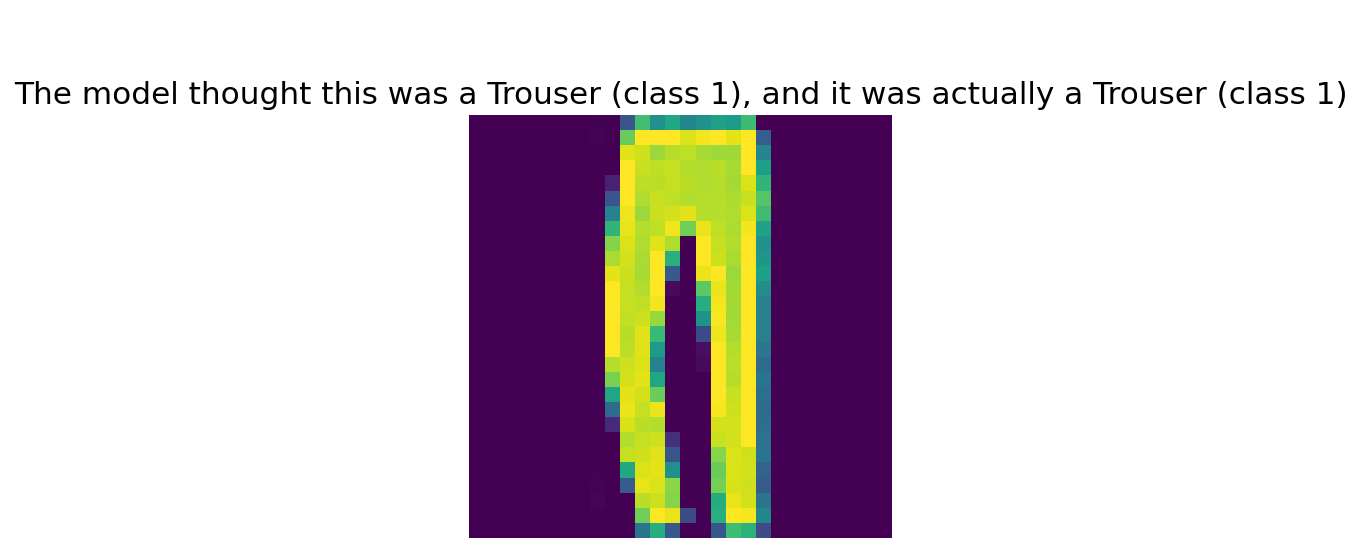

In [298]:
# docs_infra: no_execute
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

for i in range(0,3):
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[np.argmax(predictions[i])], np.argmax(predictions[i]), class_names[test_labels[i]], test_labels[i]))